### Preparation of the data

In [17]:
%pip install seaborn wordcloud pyyaml matplotlib

Note: you may need to restart the kernel to use updated packages.


In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pathlib import Path
from utils import get_configs, get_duplicates, load_data, display_unique_values, merge_datasets
from params import REFERENCE_DATE, DEFAULT_JOB_TYPE, DEFAULT_EMAIL_PROVIDER, MISSING_FLOAT_DEFAULT

In [5]:
config = get_configs('configs.yaml')

In [6]:
base_path = config['data_paths']['base_path']
file_paths = config['data_paths']

#### Data Types

In [7]:
df_customers = load_data(os.path.join(base_path, file_paths['customers']), dtype={
    'customer_id': str,
    'address_id': str,
    'birthdate': str,
    'gender': str,
    'job_type': str,
    'email_provider': str,
    'flag_phone_provided': float,
    'flag_privacy': bool
}, parse_dates=['birthdate'])

df_products = load_data(os.path.join(base_path, file_paths['products']), dtype={
    'product_id': str,
    'product_class': str
})

df_labelled_reviews = load_data(os.path.join(base_path, file_paths['labelled_reviews']), dtype={
    'labelled_reviews_index': str,
    'review_text': str,
    'sentiment_label': str
})

df_orders = load_data(os.path.join(base_path, file_paths['orders']), dtype={
    'order_id': str,
    'customer_id': str,
    'store_id': str,
    'product_id': str,
    'direction': int,
    'gross_price': float,
    'price_reduction': float
}, parse_dates=['purchase_datetime'])

df_addresses = load_data(os.path.join(base_path, file_paths['addresses']), dtype={
    'address_id': str,
    'postal_code': str,
    'district': str,
    'region': str
})

df_customer_reviews = load_data(os.path.join(base_path, file_paths['customer_reviews']), dtype={
    'review_id': str,
    'customer_id': str,
    'review_text': str
})

df_customer_accounts = load_data(os.path.join(base_path, file_paths['customer_accounts']), dtype={
    'customer_id': str,
    'account_id': str,
    'favorite_store': str,
    'loyalty_type': str,
    'loyalty_status': bool
}, parse_dates=['activation_date'])

# Verify data types
print("Data Types for Each DataFrame:")
for df_name, df in [('Customers', df_customers), ('Products', df_products), ('Orders', df_orders), ('Addresses', df_addresses), ('Customer Reviews', df_customer_reviews), ('Customer Accounts', df_customer_accounts)]:
    print(f"\n{df_name} DataFrame:")
    print(df.dtypes)

Data Types for Each DataFrame:

Customers DataFrame:
customer_id             object
address_id              object
birthdate               object
gender                  object
job_type                object
email_provider          object
flag_phone_provided    float64
flag_privacy              bool
dtype: object

Products DataFrame:
product_id       object
product_class    object
dtype: object

Orders DataFrame:
order_id                     object
customer_id                  object
store_id                     object
product_id                   object
direction                     int64
gross_price                 float64
price_reduction             float64
purchase_datetime    datetime64[ns]
dtype: object

Addresses DataFrame:
address_id     object
postal_code    object
district       object
region         object
dtype: object

Customer Reviews DataFrame:
review_id      object
customer_id    object
review_text    object
dtype: object

Customer Accounts DataFrame:
customer_id       

#### Missing Values

In [8]:
# Customers

# Filling missing values for job_type with 'Unknown', email_provider with 'unknown@example.com', and 'False' if NaN in flag_phone
df_customers['job_type'].fillna(DEFAULT_JOB_TYPE, inplace=True)
df_customers['email_provider'].fillna(DEFAULT_EMAIL_PROVIDER, inplace=True)
df_customers['flag_phone_provided'].fillna(MISSING_FLOAT_DEFAULT, inplace=True)
# Phone provided from float to bool
df_customers['flag_phone_provided'] = df_customers['flag_phone_provided'].apply(lambda x: x == 1.0)

# Already check and no NaT in 'birthdate', 'purchase_datetime', 'activation_date'

/tmp/ipykernel_9987/3298989086.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_customers['job_type'].fillna(DEFAULT_JOB_TYPE, inplace=True)
/tmp/ipykernel_9987/3298989086.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

#### Duplicates

In [9]:
df_orders.drop_duplicates(inplace=True)
print(f"Total rows after removing exact duplicates in Orders: {len(df_orders)}")

df_addresses.drop_duplicates(inplace=True)
print(f"Total rows after removing exact duplicates in Addresses: {len(df_addresses)}")

Total rows after removing exact duplicates in Orders: 917000
Total rows after removing exact duplicates in Addresses: 157765


In [25]:
customer_data, order_data, merged_data = merge_datasets(df_customers, df_products, df_orders, df_addresses, df_customer_accounts)
merged_data.head()

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,product_class,address_id,...,flag_phone_provided,flag_privacy,postal_code,district,region,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.0,2022-10-04 18:28:51,6,21,...,True,True,21050,VA,LOMBARDIA,512658,49,standard,1,2022-09-08
1,8fe4346b53d0c781b275a614175804de,23,49,30344384,1,8.30,0.0,2022-10-04 18:28:51,6,21,...,True,True,21050,VA,LOMBARDIA,512658,49,standard,1,2022-09-08
2,8fe4346b53d0c781b275a614175804de,23,49,33794292,1,1.99,0.0,2022-10-04 18:28:51,6,21,...,True,True,21050,VA,LOMBARDIA,512658,49,standard,1,2022-09-08
3,8fe4346b53d0c781b275a614175804de,23,49,33795776,1,5.10,0.0,2022-10-04 18:28:51,6,21,...,True,True,21050,VA,LOMBARDIA,512658,49,standard,1,2022-09-08
4,8fe4346b53d0c781b275a614175804de,23,49,36235381,1,76.05,0.0,2022-10-04 18:28:51,6,21,...,True,True,21050,VA,LOMBARDIA,512658,49,standard,1,2022-09-08


In [36]:
merged_data.columns

Index(['order_id', 'customer_id', 'store_id', 'product_id', 'direction',
       'gross_price', 'price_reduction', 'purchase_datetime', 'product_class',
       'address_id', 'birthdate', 'gender', 'job_type', 'email_provider',
       'flag_phone_provided', 'flag_privacy', 'postal_code', 'district',
       'region', 'account_id', 'favorite_store', 'loyalty_type',
       'loyatlty_status', 'activation_date'],
      dtype='object')

In [37]:
merged_data['birthdate']

0        NaT
1        NaT
2        NaT
3        NaT
4        NaT
          ..
919824   NaT
919825   NaT
919826   NaT
919827   NaT
919828   NaT
Name: birthdate, Length: 917000, dtype: datetime64[ns]

#### Customer Demographics


Customer Demographics Analysis
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: age, dtype: float64


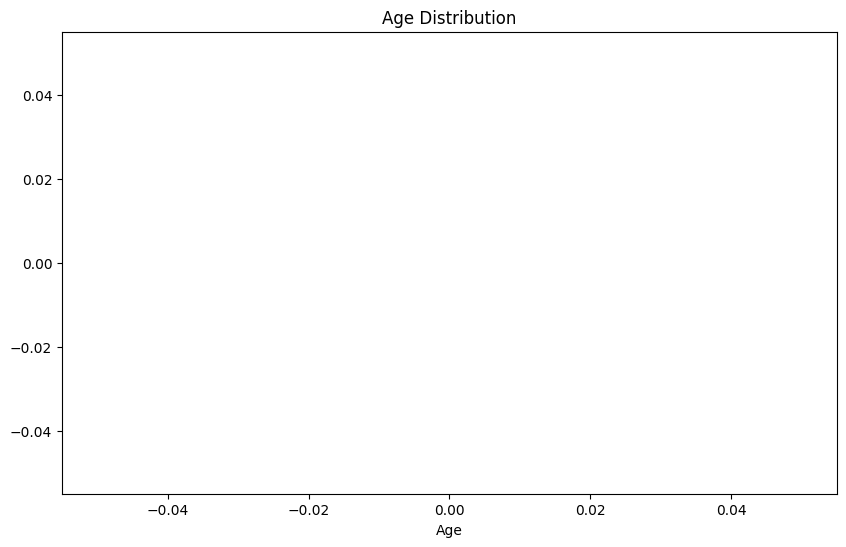

IndexError: index 0 is out of bounds for axis 0 with size 0

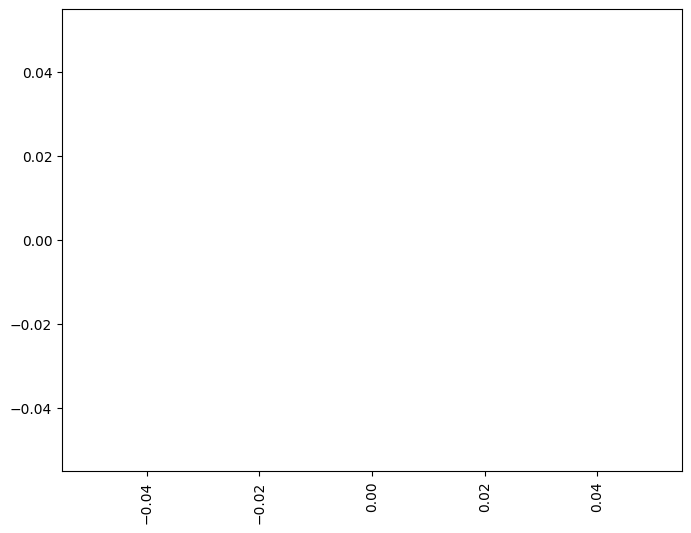

In [35]:
def analyze_customer_demographics(merged_data):
    print("\nCustomer Demographics Analysis")
    
    # Handle missing values and drop rows with NaT birthdate
    merged_data['birthdate'] = pd.to_datetime(merged_data['birthdate'], errors='coerce')
    merged_data = merged_data.dropna(subset=['birthdate'])
    merged_data['gender'] = merged_data['gender'].fillna('Unknown')
    merged_data['job_type'] = merged_data['job_type'].fillna('Unknown')

    # Calculate age
    current_date = pd.Timestamp.now()
    merged_data['age'] = pd.to_numeric((REFERENCE_DATE - merged_data['birthdate']).dt.days, downcast='integer').div(365).round().astype(int)
    
    print(merged_data['age'].describe())
    
    # Age distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(merged_data['age'], kde=True)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.show()

    # Gender distribution
    gender_counts = merged_data['gender'].value_counts()
    plt.figure(figsize=(8, 6))
    gender_counts.plot(kind='bar')
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

    # Job type distribution (top 10)
    job_counts = merged_data['job_type'].value_counts().nlargest(10)
    plt.figure(figsize=(12, 6))
    job_counts.plot(kind='bar')
    plt.title('Top 10 Job Types')
    plt.xlabel('Job Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

analyze_customer_demographics(df_customers)

#### Order Patterns


Order Patterns Analysis


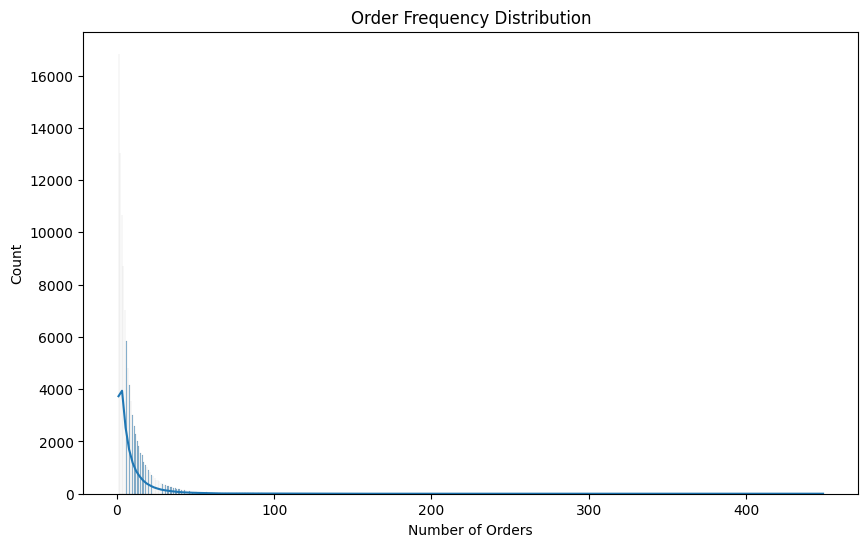

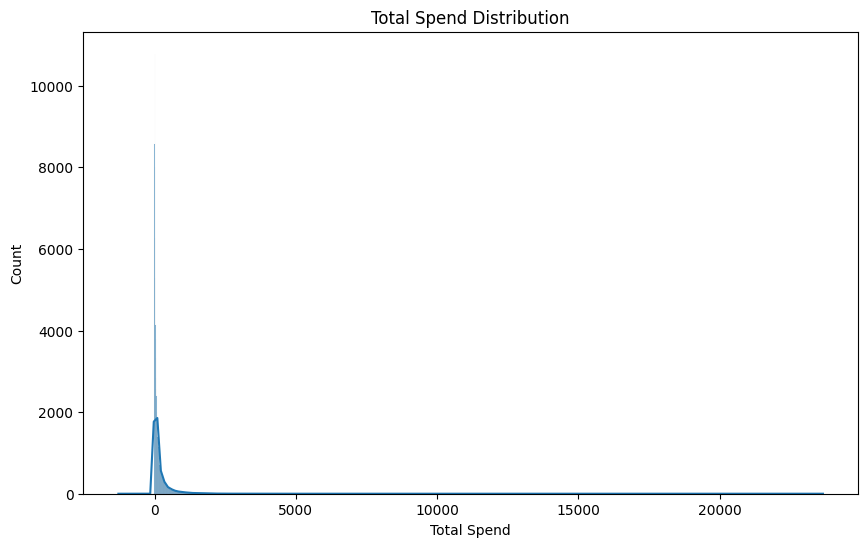

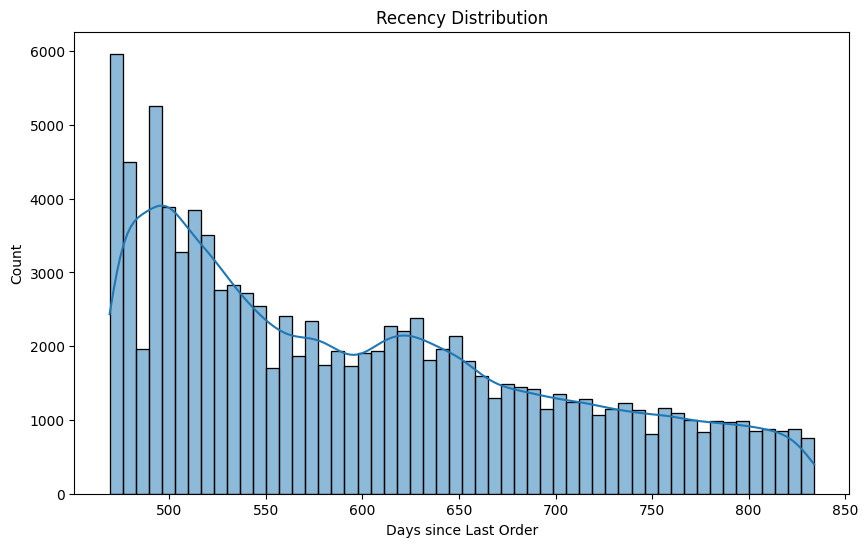

In [12]:
def analyze_order_patterns(order_data):
    print("\nOrder Patterns Analysis")
    
    # Frequency: number of orders per customer
    order_frequency = order_data.groupby('customer_id').size().reset_index(name='order_count')
    plt.figure(figsize=(10, 6))
    sns.histplot(order_frequency['order_count'], kde=True)
    plt.title('Order Frequency Distribution')
    plt.xlabel('Number of Orders')
    plt.show()

    # Monetary Value: total spend per customer
    monetary_value = order_data.groupby('customer_id')['gross_price'].sum().reset_index(name='total_spend')
    plt.figure(figsize=(10, 6))
    sns.histplot(monetary_value['total_spend'], kde=True)
    plt.title('Total Spend Distribution')
    plt.xlabel('Total Spend')
    plt.show()

    # Recency: days since last order
    last_order_date = order_data.groupby('customer_id')['purchase_datetime'].max().reset_index(name='last_order_date')
    last_order_date['recency'] = (REFERENCE_DATE - last_order_date['last_order_date']).dt.days
    plt.figure(figsize=(10, 6))
    sns.histplot(last_order_date['recency'], kde=True)
    plt.title('Recency Distribution')
    plt.xlabel('Days since Last Order')
    plt.show()

analyze_order_patterns(order_data)

#### Product Popularity


Product Popularity Analysis


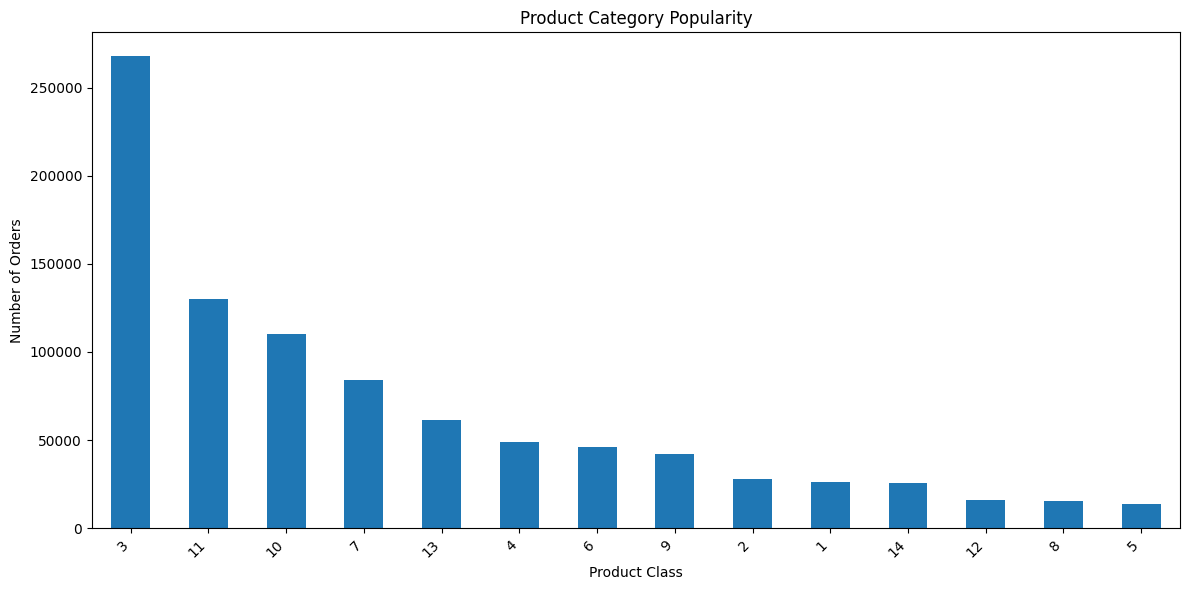

In [13]:
def analyze_product_popularity(merged_data):
    print("\nProduct Popularity Analysis")
    
    # Product category popularity
    category_popularity = merged_data.groupby('product_class').size().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    category_popularity.plot(kind='bar')
    plt.title('Product Category Popularity')
    plt.xlabel('Product Class')
    plt.ylabel('Number of Orders')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

analyze_product_popularity(merged_data)


#### Customer Reviews Analysis


Customer Reviews Analysis


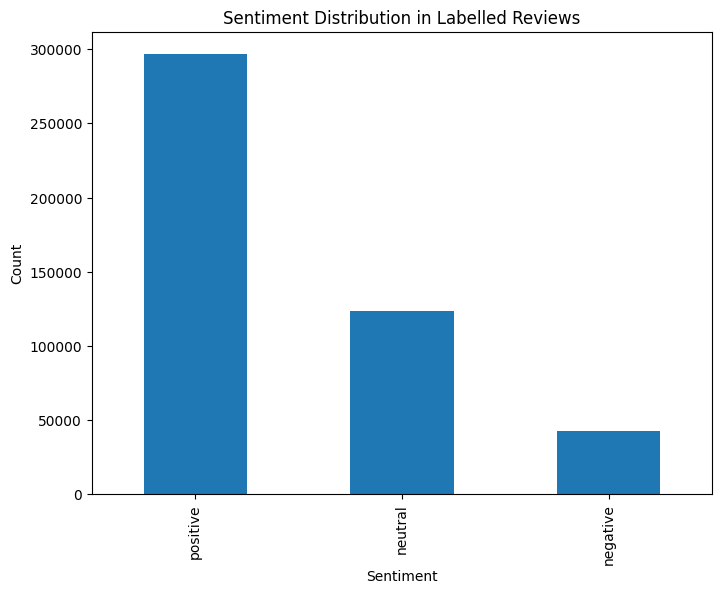

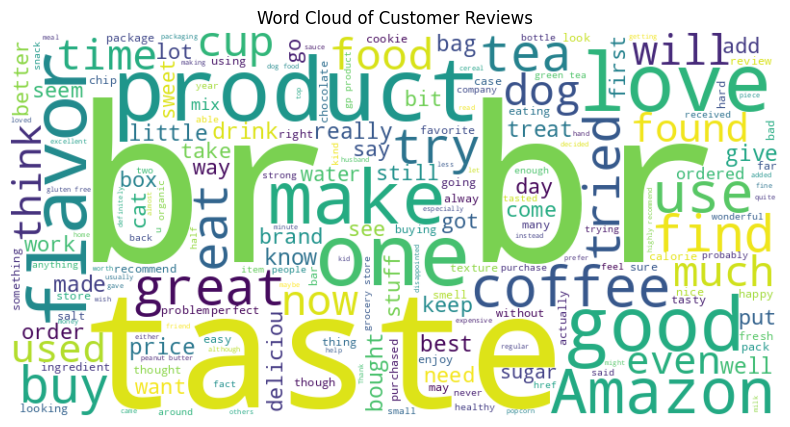

In [14]:
def analyze_customer_reviews(df_customer_reviews, df_labelled_reviews):
    print("\nCustomer Reviews Analysis")
    
    # Sentiment distribution in labelled reviews
    sentiment_counts = df_labelled_reviews['sentiment_label'].value_counts()
    plt.figure(figsize=(8, 6))
    sentiment_counts.plot(kind='bar')
    plt.title('Sentiment Distribution in Labelled Reviews')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

    # Word cloud of review text
    from wordcloud import WordCloud
    all_reviews = ' '.join(df_customer_reviews['review_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Customer Reviews')
    plt.show()

analyze_customer_reviews(df_customer_reviews, df_labelled_reviews)  

# Experimental (we can remove this later)

In [15]:
# df_customers = load_data(os.path.join(base_path, file_paths['customers']))
# df_products = load_data(os.path.join(base_path, file_paths['products']))
# df_labelled_reviews = load_data(os.path.join(base_path, file_paths['labelled_reviews']))
# df_orders = load_data(os.path.join(base_path, file_paths['orders']))
# df_addresses = load_data(os.path.join(base_path, file_paths['addresses']))
# df_customer_reviews = load_data(os.path.join(base_path, file_paths['customer_reviews']))
# df_customer_accounts = load_data(os.path.join(base_path, file_paths['customer_accounts']))


# print("The first 3 entry for Each DataFrame:")
# for df_name, df in [('Customers', df_customers), ('Products', df_products), ('Orders', df_orders), ('Addresses', df_addresses), ('Customer Reviews', df_customer_reviews), ('Customer Accounts', df_customer_accounts)]:
#     print(f"\n{df_name} DataFrame:")
#     print(df.head(3))

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Function to detect and handle outliers
def detect_and_handle_outliers(df, columns):
    for col in columns:
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            z_scores = np.abs(zscore(df[col].dropna()))
            # log when outliers are detected and replaced
            if np.sum(z_scores > 3) > 0:
                print(f"[LOG] Outliers detected in column '{col}'")
            outlier_indices = np.where(z_scores > 3)[0]
            df.loc[df.index[outlier_indices], col] = df[col].median()
    return df

# Function to assign review sentiment score
def assign_review_sentiment_score(review_data):
    sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
    review_data['sentiment_score'] = review_data['sentiment_label'].map(sentiment_map)
    return review_data

# Function to join the datasets with adjusted logic
def join_datasets_corrected(df_customers, df_products, df_labelled_reviews, df_orders, df_addresses, df_customer_reviews, df_customer_accounts):
    # Join Customers, Orders, and Addresses
    customer_order_address = df_customers.merge(df_orders, on='customer_id', how='left') \
                                         .merge(df_addresses, on='address_id', how='left')

    # Join Products
    customer_order_address_products = customer_order_address.merge(df_products, on='product_id', how='left')

    # Join Customer Reviews
    merged_data = customer_order_address_products.merge(df_customer_reviews, on='customer_id', how='left')

    # Join Customer Accounts
    merged_data = merged_data.merge(df_customer_accounts, on='customer_id', how='left')

    # Add sentiment_score from df_labelled_reviews based on review_text match
    merged_data = merged_data.merge(df_labelled_reviews[['review_text', 'sentiment_score']], on='review_text', how='left')
    
    return merged_data

# Explore insights from the joined dataset
def explore_joined_data(merged_data):
    # Analyze the relationship between customer demographics and order patterns
    sns.scatterplot(x='birthdate', y='gross_price', data=merged_data, edgecolor='none')
    plt.title('Birthdate vs. Gross Price')
    plt.show()

    sns.barplot(x='gender', y='gross_price', data=merged_data)
    plt.title('Gender vs. Gross Price')
    plt.show()

    # Explore the relationship between product characteristics and customer reviews
    sns.scatterplot(x='sentiment_score', y='gross_price', data=merged_data, edgecolor='none')
    plt.title('Sentiment Score vs. Gross Price')
    plt.show()

    sns.scatterplot(x='product_class', y='gross_price', data=merged_data, edgecolor='none')
    plt.title('Product Class vs. Gross Price')
    plt.show()

    # Analyze the impact of customer loyalty on order patterns
    sns.scatterplot(x='loyalty_type', y='gross_price', data=merged_data, edgecolor='none')
    plt.title('Loyalty Type vs. Gross Price')
    plt.show()

# Main function to run the data exploration and outlier detection with corrected dataset joining
def explore_data_quality_and_insights_corrected():
    # Create synthetic datasets based on the provided structure

    # df_customers = pd.DataFrame({
    #     'customer_id': ['891057', '655484', '514958'],
    #     'address_id': ['863914', '639856', '494806'],
    #     'birthdate': pd.to_datetime(['2001-10-22', '2001-04-30', '2001-01-01']),
    #     'gender': ['F', 'M', 'M'],
    #     'job_type': [np.nan, np.nan, np.nan],
    #     'email_provider': ['yahoo.it', 'yahoo.it', 'libero.it'],
    #     'flag_phone_provided': [1.0, 1.0, 1.0],
    #     'flag_privacy': [True, False, True]
    # })

    # df_products = pd.DataFrame({
    #     'product_id': ['35996051', '35980371', '31276196'],
    #     'product_class': ['9', '14', '4']
    # })

    # df_labelled_reviews = pd.DataFrame({
    #     'labelled_reviews_index': ['1', '2', '3'],
    #     'review_text': ['Great product!', 'Not bad', 'Worst product ever'],
    #     'sentiment_label': ['positive', 'neutral', 'negative']
    # })

    # df_orders = pd.DataFrame({
    #     'order_id': ['8fe4346b53d0c781b275a614175804de', '8fe4346b53d0c781b275a614175804de', '8fe4346b53d0c781b275a614175804de'],
    #     'customer_id': ['23', '23', '23'],
    #     'store_id': ['49', '49', '49'],
    #     'product_id': ['35551922', '30344384', '33794292'],
    #     'direction': [1, 1, 1],
    #     'gross_price': [125.40, 8.30, 1.99],
    #     'price_reduction': [0.0, 0.0, 0.0],
    #     'purchase_datetime': pd.to_datetime(['2022-10-04 18:28:51', '2022-10-04 18:28:51', '2022-10-04 18:28:51'])
    # })

    # df_addresses = pd.DataFrame({
    #     'address_id': ['1337', '1347', '1347'],
    #     'postal_code': ['20083', '20090', '20090'],
    #     'district': ['MI', 'MI', 'MI'],
    #     'region': ['LOMBARDIA', 'LOMBARDIA', 'LOMBARDIA']
    # })

    # df_customer_reviews = pd.DataFrame({
    #     'review_id': ['1', '2', '3'],
    #     'customer_id': ['814256', '457475', '104045'],
    #     'review_text': [
    #         'I have bought several of the Vitality canned dog food products and have found them all to be of good quality.',
    #         'Product arrived labeled as Jumbo Salted Peanuts... the peanuts were actually small and unsalted.',
    #         'This is a confection that has been around a few centuries.  I love it, and this brand is my favorite.'
    #     ]
    # })

    # df_customer_accounts = pd.DataFrame({
    #     'customer_id': ['9557', '743090', '813156'],
    #     'account_id': ['746573', '776971', '791681'],
    #     'favorite_store': ['9', '2', '45'],
    #     'loyalty_type': ['premium', 'premium', 'premium'],
    #     'loyatlty_status': [1, 1, 1],
    #     'activation_date': pd.to_datetime(['2023-01-11', '2023-01-30', '2023-02-08'])
    # })
    
    df_customers = load_data(os.path.join(base_path, file_paths['customers']))
    df_products = load_data(os.path.join(base_path, file_paths['products']))
    df_labelled_reviews = load_data(os.path.join(base_path, file_paths['labelled_reviews']))
    df_orders = load_data(os.path.join(base_path, file_paths['orders']))
    df_addresses = load_data(os.path.join(base_path, file_paths['addresses']))
    df_customer_reviews = load_data(os.path.join(base_path, file_paths['customer_reviews']))
    df_customer_accounts = load_data(os.path.join(base_path, file_paths['customer_accounts']))

    # Assign review sentiment score
    df_labelled_reviews = assign_review_sentiment_score(df_labelled_reviews)

    # Detect and handle outliers
    df_customers = detect_and_handle_outliers(df_customers, ['flag_phone_provided'])
    df_orders = detect_and_handle_outliers(df_orders, ['gross_price'])

    # Join the datasets
    merged_data = join_datasets_corrected(df_customers, df_products, df_labelled_reviews, df_orders, df_addresses, df_customer_reviews, df_customer_accounts)

    # Explore insights from the joined dataset
    explore_joined_data(merged_data)
    
    return merged_data

# Call the corrected main function
merged_data_corrected = explore_data_quality_and_insights_corrected()


ModuleNotFoundError: No module named 'scipy'

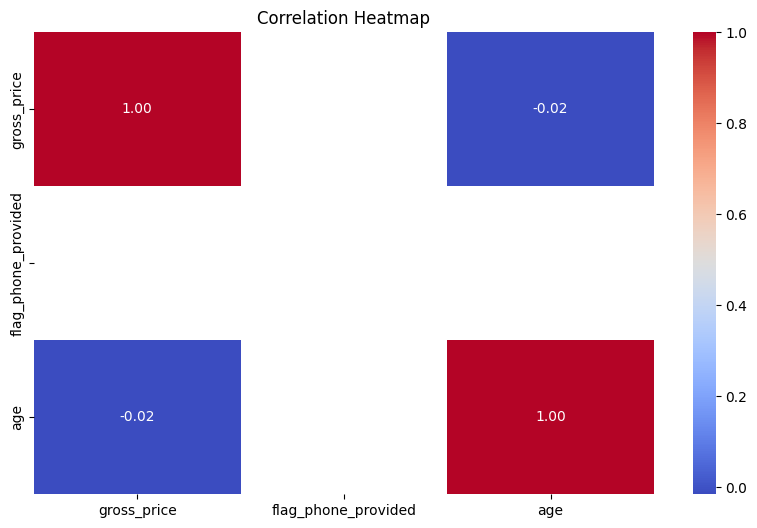

Customer Demographics Summary:
  Gender  Avg Gross Price  Total Gross Price  Order Count    Avg Age  Min Age  \
0      F        17.108734        24769153.00      1447749  46.452945       21   
1      M        16.784126        30218526.47      1800423  51.876471       22   

   Max Age  
0       94  
1       91  


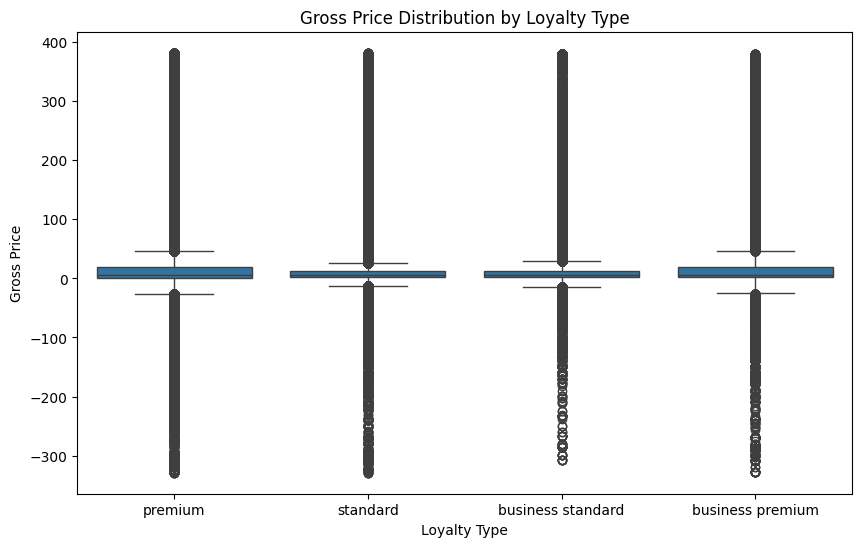

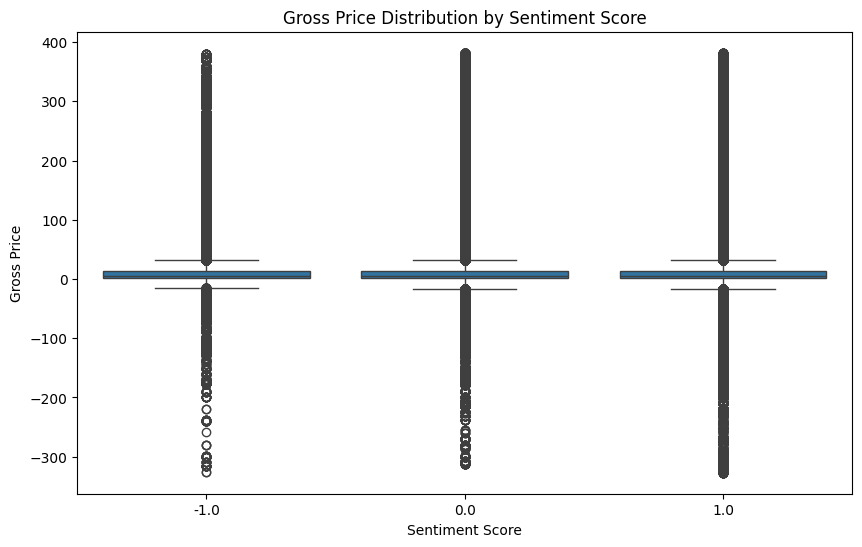

In [18]:
def generate_insights(merged_data):
    # Convert birthdate to age, ensuring birthdate is in datetime format
    if 'birthdate' in merged_data.columns:
        merged_data['birthdate'] = pd.to_datetime(merged_data['birthdate'], errors='coerce')
        current_year = pd.Timestamp.now().year
        merged_data['age'] = current_year - merged_data['birthdate'].dt.year
    
    # 2. Correlation Heatmap
    plt.figure(figsize=(10, 6))
    corr = merged_data[['gross_price', 'flag_phone_provided', 'age']].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
    
    # 3. Customer Demographics Summary
    demographics_summary = merged_data.groupby(['gender']).agg({
        'gross_price': ['mean', 'sum', 'count'],
        'age': ['mean', 'min', 'max']
    }).reset_index()
    demographics_summary.columns = ['Gender', 'Avg Gross Price', 'Total Gross Price', 'Order Count', 'Avg Age', 'Min Age', 'Max Age']
    print("Customer Demographics Summary:")
    print(demographics_summary)
    
    # 4. Loyalty Program Impact on Spending
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='loyalty_type', y='gross_price', data=merged_data)
    plt.title('Gross Price Distribution by Loyalty Type')
    plt.xlabel('Loyalty Type')
    plt.ylabel('Gross Price')
    plt.show()
    
    # 5. Sentiment Analysis of Product Reviews
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='sentiment_score', y='gross_price', data=merged_data)
    plt.title('Gross Price Distribution by Sentiment Score')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Gross Price')
    plt.show()

# Ensure 'age' is calculated correctly before generating insights
generate_insights(merged_data_corrected)


Customer Demographics Summary:
  Gender  Avg Gross Price  Total Gross Price  Order Count    Avg Age  Min Age  \
0      F        17.108734        24769153.00      1447749  46.452945       21   
1      M        16.784126        30218526.47      1800423  51.876471       22   

   Max Age  
0       94  
1       91  


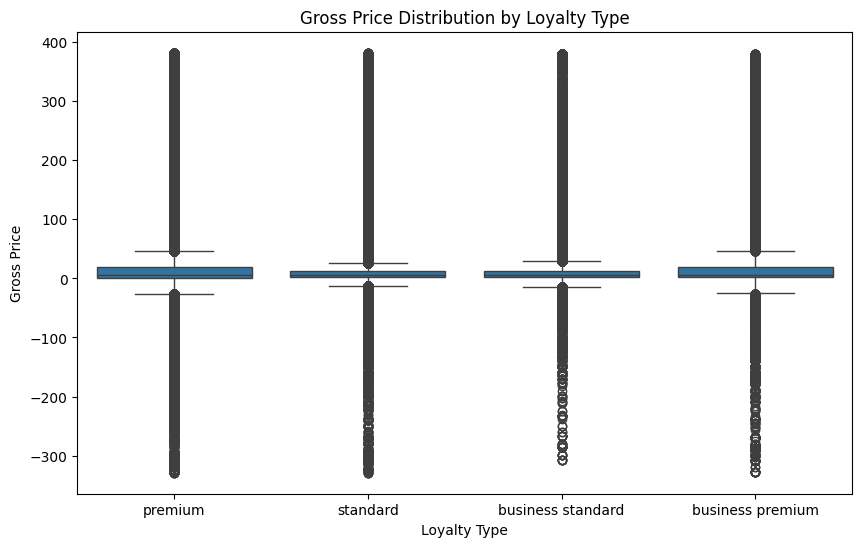

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

def generate_insights(merged_data: pd.DataFrame) -> None:
    """
    Generate various insights from the merged data including distribution, correlation, demographics summary, 
    loyalty program impact, sentiment analysis, product correlation, and differences across product categories by sex.
    """
    # Convert birthdate to age, ensuring birthdate is in datetime format
    if 'birthdate' in merged_data.columns:
        merged_data['birthdate'] = pd.to_datetime(merged_data['birthdate'], errors='coerce')
        current_year = pd.Timestamp.now().year
        merged_data['age'] = current_year - merged_data['birthdate'].dt.year
    
    # 3. Customer Demographics Summary
    demographics_summary = merged_data.groupby(['gender']).agg({
        'gross_price': ['mean', 'sum', 'count'],
        'age': ['mean', 'min', 'max']
    }).reset_index()
    demographics_summary.columns = ['Gender', 'Avg Gross Price', 'Total Gross Price', 'Order Count', 'Avg Age', 'Min Age', 'Max Age']
    print("Customer Demographics Summary:")
    print(demographics_summary)
    
    # 4. Loyalty Program Impact on Spending
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='loyalty_type', y='gross_price', data=merged_data)
    plt.title('Gross Price Distribution by Loyalty Type')
    plt.xlabel('Loyalty Type')
    plt.ylabel('Gross Price')
    plt.show()
    
    # 7. Differences Across Product Categories by Sex
    if 'product_category' in merged_data.columns and 'gender' in merged_data.columns:
        plt.figure(figsize=(12, 8))
        sns.boxplot(x='product_category', y='gross_price', hue='gender', data=merged_data)
        plt.title('Gross Price Distribution by Product Category and Gender')
        plt.xlabel('Product Category')
        plt.ylabel('Gross Price')
        plt.xticks(rotation=45)
        plt.legend(title='Gender')
        plt.show()

# Ensure 'age' is calculated correctly before generating insights
generate_insights(merged_data_corrected)

merged_data.columns

Index(['order_id', 'customer_id', 'store_id', 'product_id', 'direction',
       'gross_price', 'price_reduction', 'purchase_datetime', 'product_class',
       'address_id', 'birthdate', 'gender', 'job_type', 'email_provider',
       'flag_phone_provided', 'flag_privacy', 'postal_code', 'district',
       'region', 'account_id', 'favorite_store', 'loyalty_type',
       'loyatlty_status', 'activation_date'],
      dtype='object')

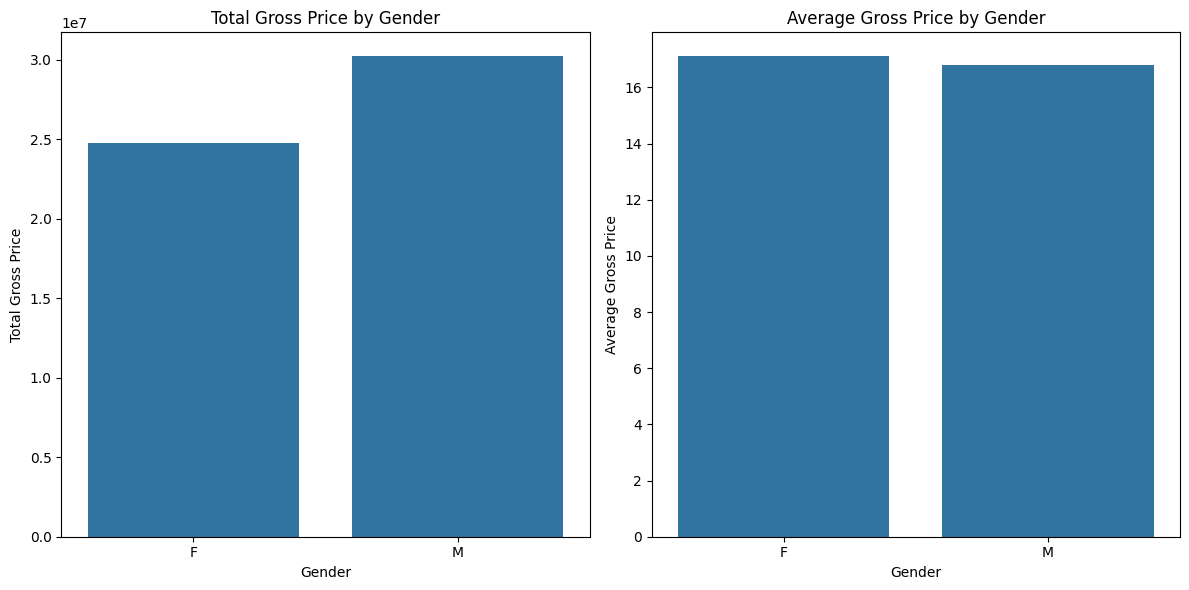

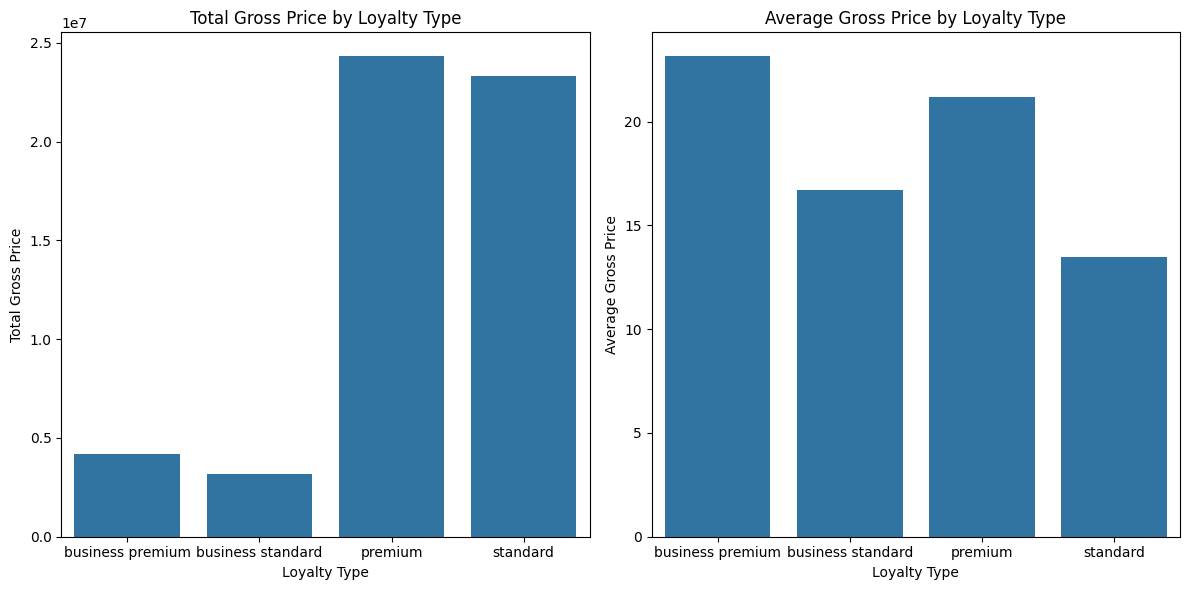

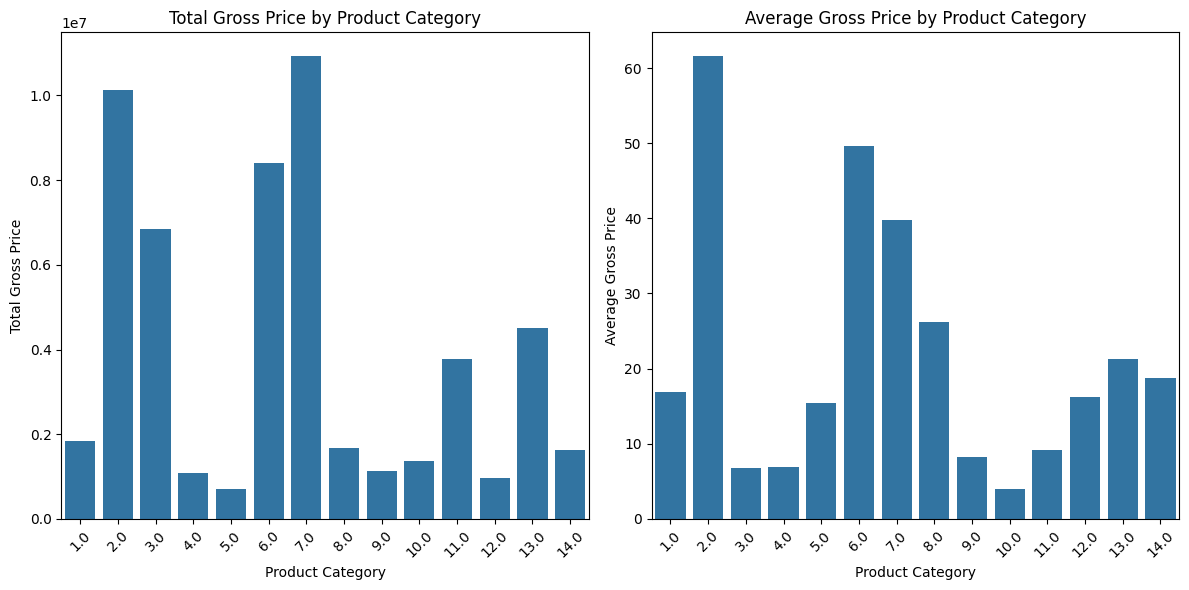

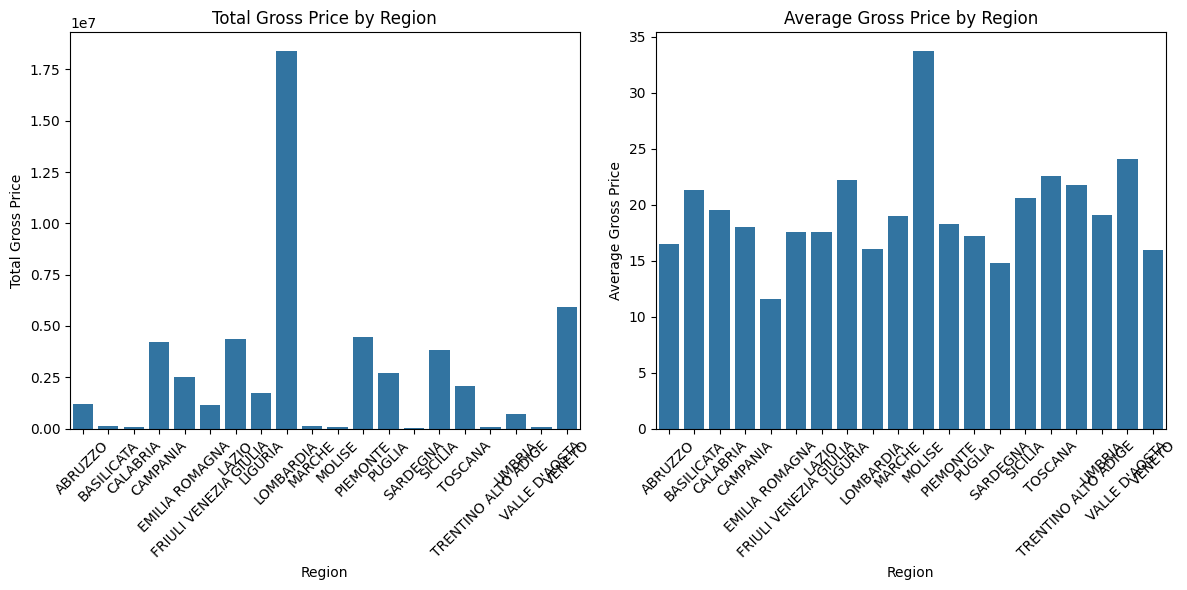

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def generate_aggregated_insights(merged_data: pd.DataFrame) -> None:
    """
    Generate insights from aggregated data including total and average gross price by gender, loyalty type, 
    product category, and region.
    """
    # 1. Total and Average Gross Price by Gender
    gender_agg = merged_data.groupby('gender').agg(
        total_gross_price=('gross_price', 'sum'),
        avg_gross_price=('gross_price', 'mean')
    ).reset_index()
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x='gender', y='total_gross_price', data=gender_agg)
    plt.title('Total Gross Price by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Total Gross Price')
    
    plt.subplot(1, 2, 2)
    sns.barplot(x='gender', y='avg_gross_price', data=gender_agg)
    plt.title('Average Gross Price by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Average Gross Price')
    plt.tight_layout()
    plt.show()
    
    # 2. Total and Average Gross Price by Loyalty Type
    loyalty_agg = merged_data.groupby('loyalty_type').agg(
        total_gross_price=('gross_price', 'sum'),
        avg_gross_price=('gross_price', 'mean')
    ).reset_index()
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x='loyalty_type', y='total_gross_price', data=loyalty_agg)
    plt.title('Total Gross Price by Loyalty Type')
    plt.xlabel('Loyalty Type')
    plt.ylabel('Total Gross Price')
    
    plt.subplot(1, 2, 2)
    sns.barplot(x='loyalty_type', y='avg_gross_price', data=loyalty_agg)
    plt.title('Average Gross Price by Loyalty Type')
    plt.xlabel('Loyalty Type')
    plt.ylabel('Average Gross Price')
    plt.tight_layout()
    plt.show()
    
    # 3. Total and Average Gross Price by Product Category
    product_category_agg = merged_data.groupby('product_class').agg(
        total_gross_price=('gross_price', 'sum'),
        avg_gross_price=('gross_price', 'mean')
    ).reset_index()
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x='product_class', y='total_gross_price', data=product_category_agg)
    plt.title('Total Gross Price by Product Category')
    plt.xlabel('Product Category')
    plt.ylabel('Total Gross Price')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    sns.barplot(x='product_class', y='avg_gross_price', data=product_category_agg)
    plt.title('Average Gross Price by Product Category')
    plt.xlabel('Product Category')
    plt.ylabel('Average Gross Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 4. Total and Average Gross Price by Region
    region_agg = merged_data.groupby('region').agg(
        total_gross_price=('gross_price', 'sum'),
        avg_gross_price=('gross_price', 'mean')
    ).reset_index()
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x='region', y='total_gross_price', data=region_agg)
    plt.title('Total Gross Price by Region')
    plt.xlabel('Region')
    plt.ylabel('Total Gross Price')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    sns.barplot(x='region', y='avg_gross_price', data=region_agg)
    plt.title('Average Gross Price by Region')
    plt.xlabel('Region')
    plt.ylabel('Average Gross Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Ensure 'age' is calculated correctly before generating insights
generate_aggregated_insights(merged_data_corrected)

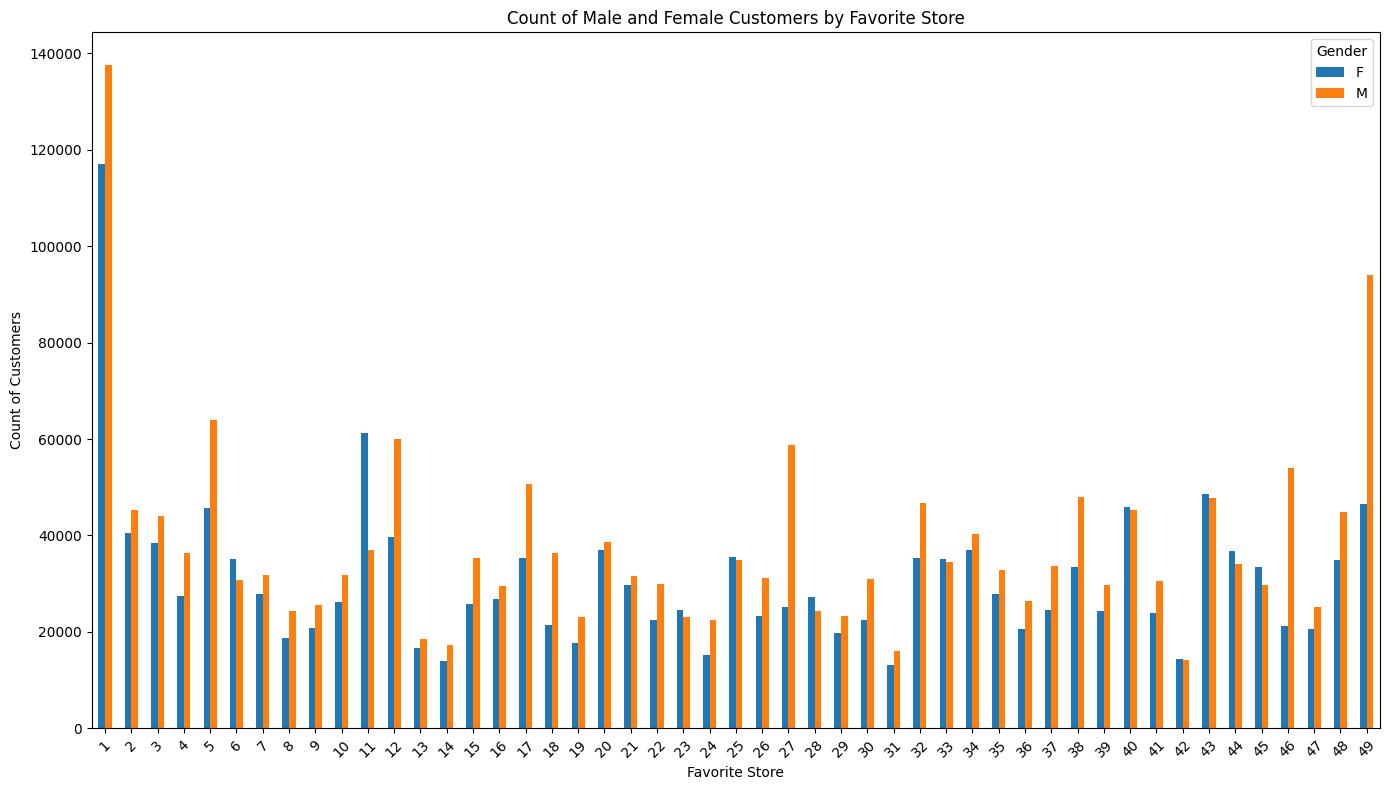

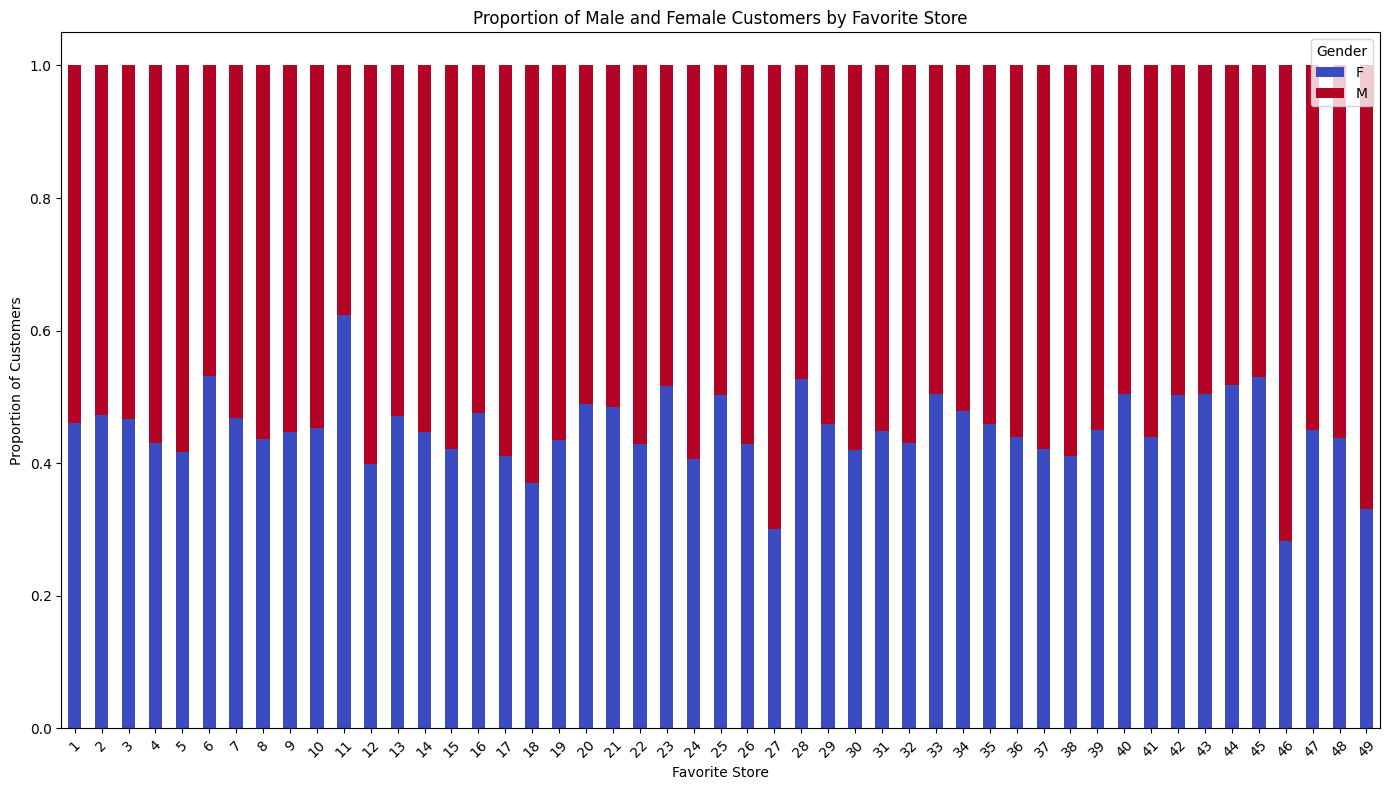

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_favorite_store_by_gender(merged_data: pd.DataFrame) -> None:
    """
    Analyze if there is a favorite store that has more male than female customers or vice versa.
    """
    # 1. Count the number of male and female customers for each favorite store
    store_gender_count = merged_data.groupby(['favorite_store', 'gender']).size().unstack(fill_value=0)
    
    # 2. Calculate the proportion of male and female customers for each favorite store
    store_gender_proportion = store_gender_count.div(store_gender_count.sum(axis=1), axis=0)
    
    # 3. Create a bar plot to show the count of male and female customers for each favorite store
    store_gender_count.plot(kind='bar', stacked=False, figsize=(14, 8))
    plt.title('Count of Male and Female Customers by Favorite Store')
    plt.xlabel('Favorite Store')
    plt.ylabel('Count of Customers')
    plt.xticks(rotation=45)
    plt.legend(title='Gender')
    plt.tight_layout()
    plt.show()
    
    # 4. Create a stacked bar plot to show the proportion of male and female customers for each favorite store
    store_gender_proportion.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='coolwarm')
    plt.title('Proportion of Male and Female Customers by Favorite Store')
    plt.xlabel('Favorite Store')
    plt.ylabel('Proportion of Customers')
    plt.xticks(rotation=45)
    plt.legend(title='Gender')
    plt.tight_layout()
    plt.show()

# Ensure 'age' is calculated correctly before generating insights
analyze_favorite_store_by_gender(merged_data_corrected)

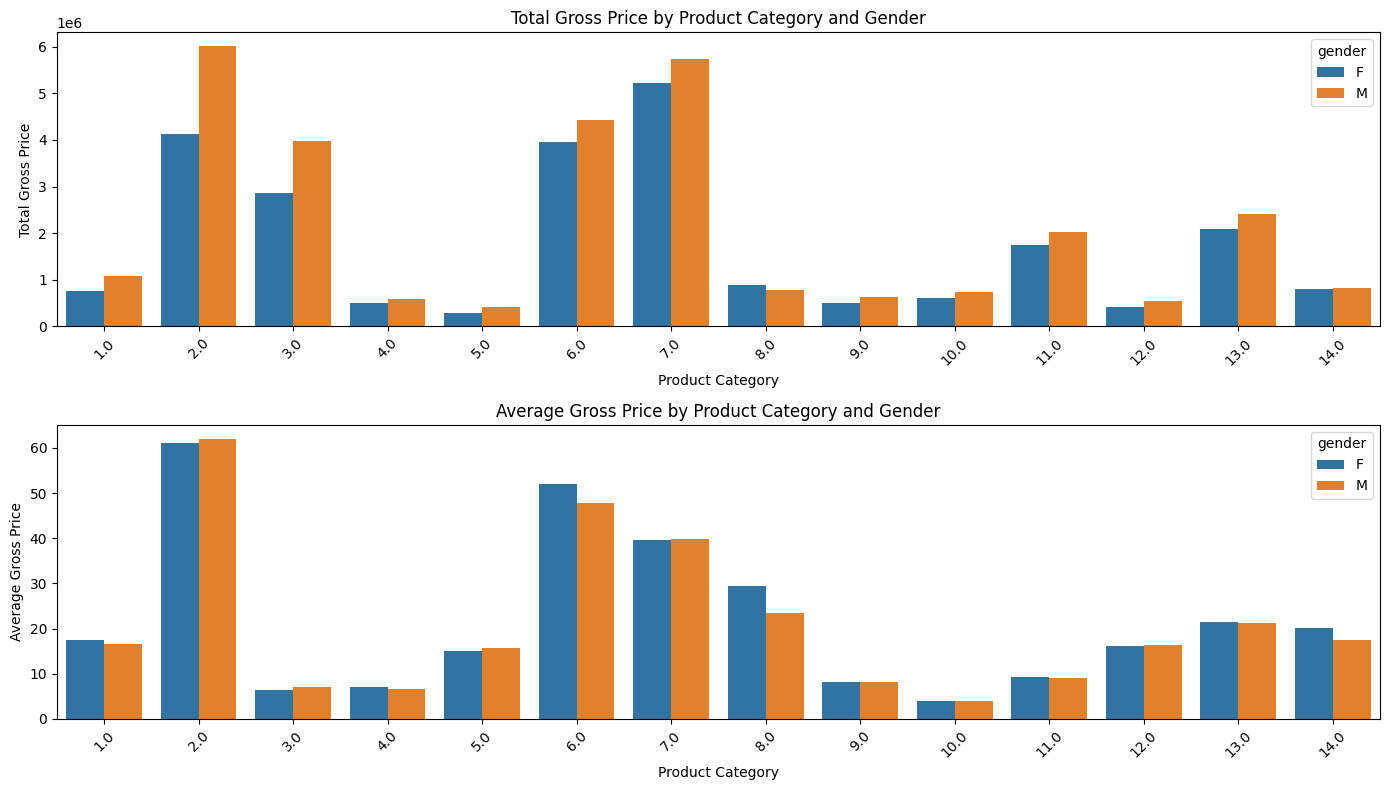

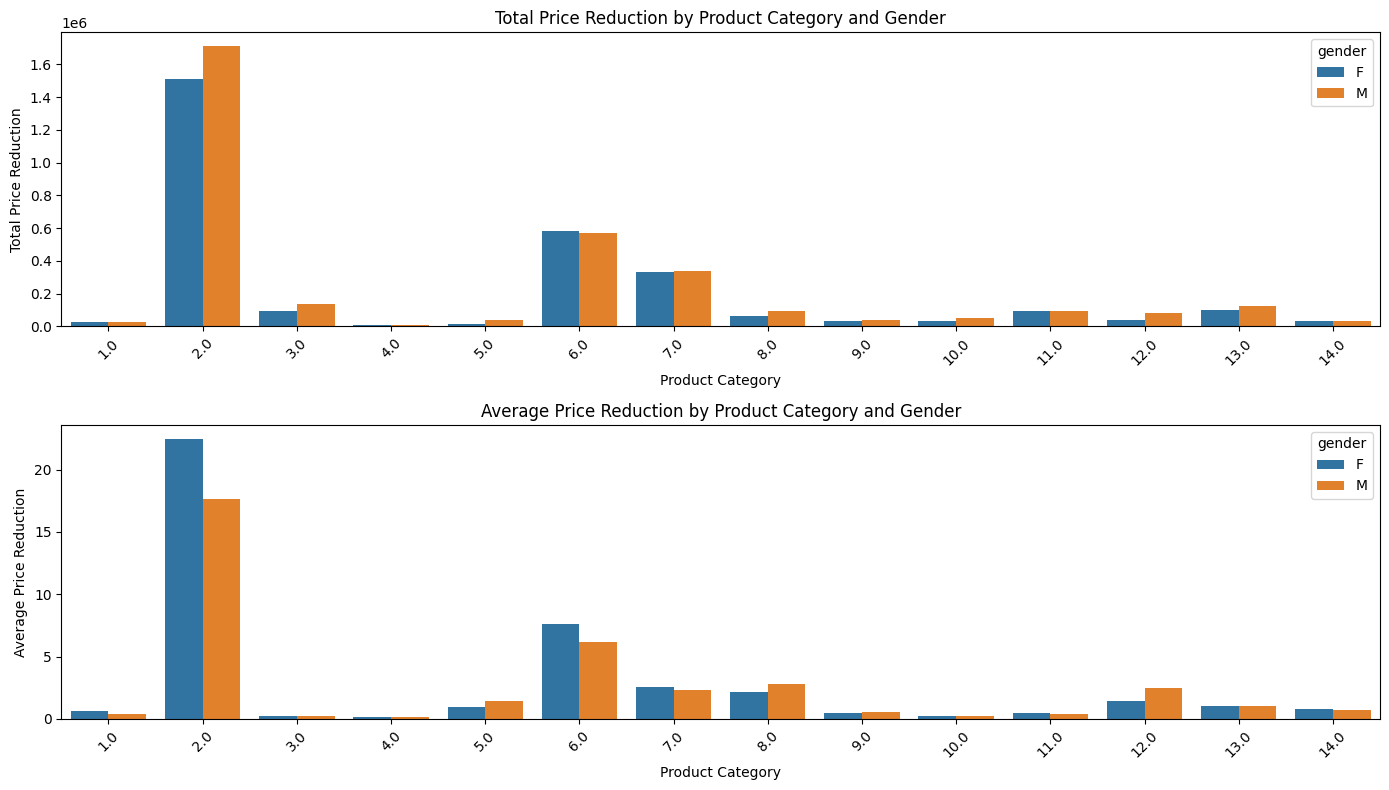

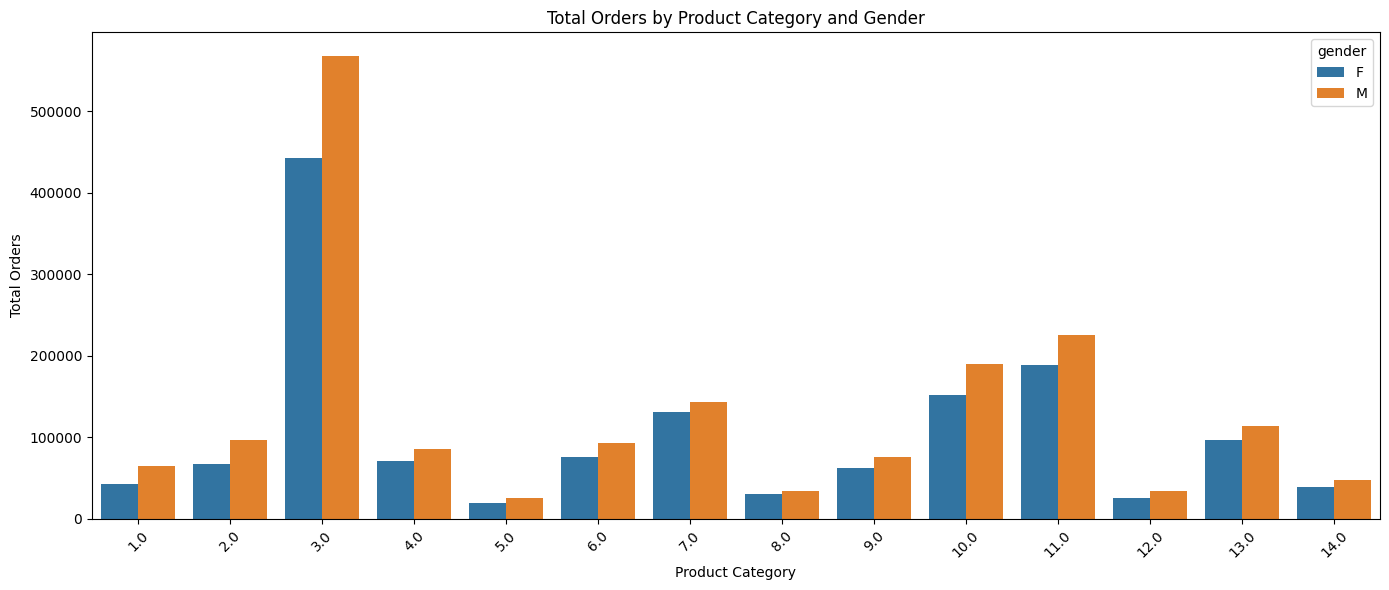

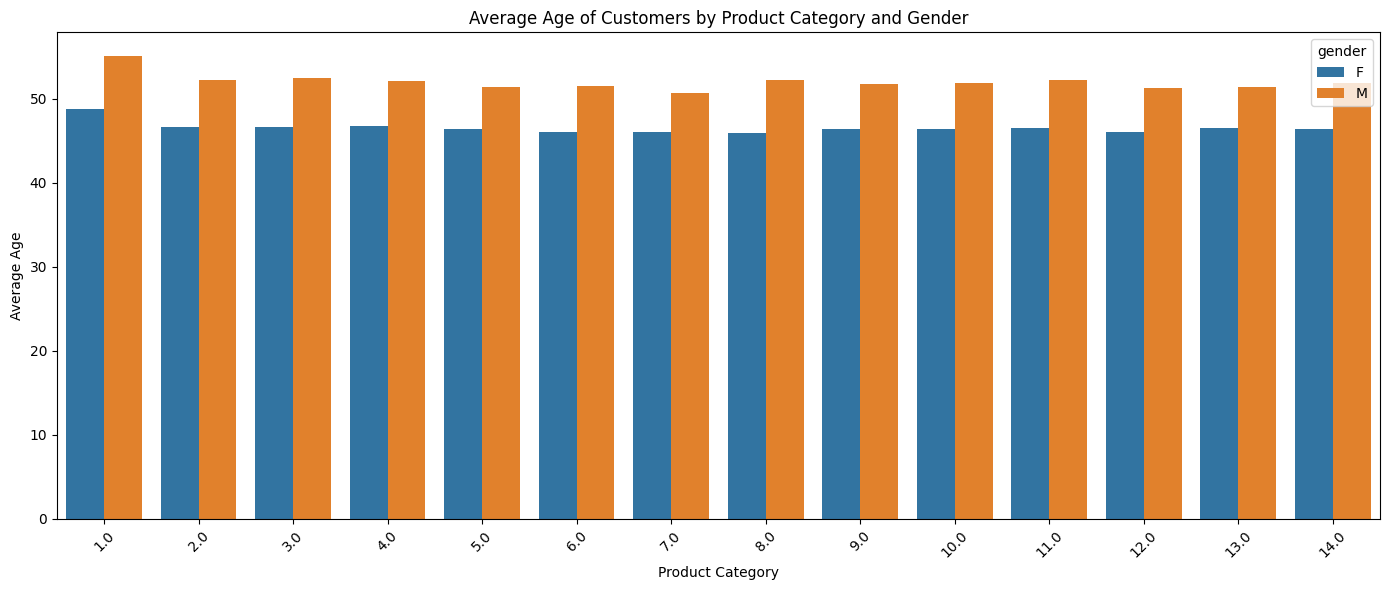

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_product_category_by_gender(merged_data: pd.DataFrame) -> None:
    """
    Analyze product category and shopping patterns divided by customer gender.
    """
    # 1. Total and Average Gross Price by Product Category and Gender
    category_gender_agg = merged_data.groupby(['product_class', 'gender']).agg(
        total_gross_price=('gross_price', 'sum'),
        avg_gross_price=('gross_price', 'mean')
    ).reset_index()
    
    plt.figure(figsize=(14, 8))
    plt.subplot(2, 1, 1)
    sns.barplot(x='product_class', y='total_gross_price', hue='gender', data=category_gender_agg)
    plt.title('Total Gross Price by Product Category and Gender')
    plt.xlabel('Product Category')
    plt.ylabel('Total Gross Price')
    plt.xticks(rotation=45)
    
    plt.subplot(2, 1, 2)
    sns.barplot(x='product_class', y='avg_gross_price', hue='gender', data=category_gender_agg)
    plt.title('Average Gross Price by Product Category and Gender')
    plt.xlabel('Product Category')
    plt.ylabel('Average Gross Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 2. Total and Average Price Reduction by Product Category and Gender
    price_reduction_agg = merged_data.groupby(['product_class', 'gender']).agg(
        total_price_reduction=('price_reduction', 'sum'),
        avg_price_reduction=('price_reduction', 'mean')
    ).reset_index()
    
    plt.figure(figsize=(14, 8))
    plt.subplot(2, 1, 1)
    sns.barplot(x='product_class', y='total_price_reduction', hue='gender', data=price_reduction_agg)
    plt.title('Total Price Reduction by Product Category and Gender')
    plt.xlabel('Product Category')
    plt.ylabel('Total Price Reduction')
    plt.xticks(rotation=45)
    
    plt.subplot(2, 1, 2)
    sns.barplot(x='product_class', y='avg_price_reduction', hue='gender', data=price_reduction_agg)
    plt.title('Average Price Reduction by Product Category and Gender')
    plt.xlabel('Product Category')
    plt.ylabel('Average Price Reduction')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 3. Total Orders by Product Category and Gender
    orders_agg = merged_data.groupby(['product_class', 'gender']).agg(
        total_orders=('order_id', 'count')
    ).reset_index()
    
    plt.figure(figsize=(14, 6))
    sns.barplot(x='product_class', y='total_orders', hue='gender', data=orders_agg)
    plt.title('Total Orders by Product Category and Gender')
    plt.xlabel('Product Category')
    plt.ylabel('Total Orders')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 4. Average Age of Customers by Product Category and Gender
    age_agg = merged_data.groupby(['product_class', 'gender']).agg(
        avg_age=('age', 'mean')
    ).reset_index()
    
    plt.figure(figsize=(14, 6))
    sns.barplot(x='product_class', y='avg_age', hue='gender', data=age_agg)
    plt.title('Average Age of Customers by Product Category and Gender')
    plt.xlabel('Product Category')
    plt.ylabel('Average Age')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Ensure 'age' is calculated correctly before generating insights
analyze_product_category_by_gender(merged_data_corrected)

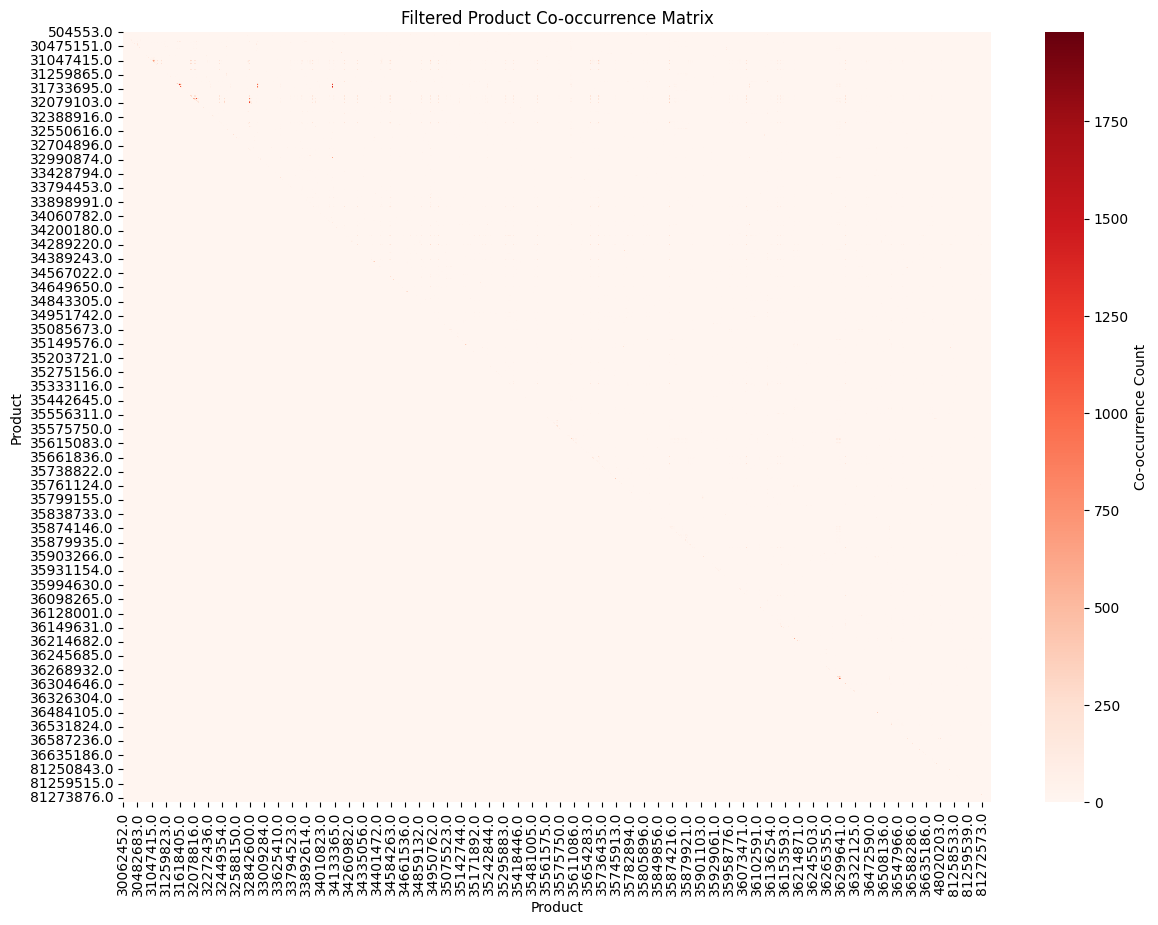

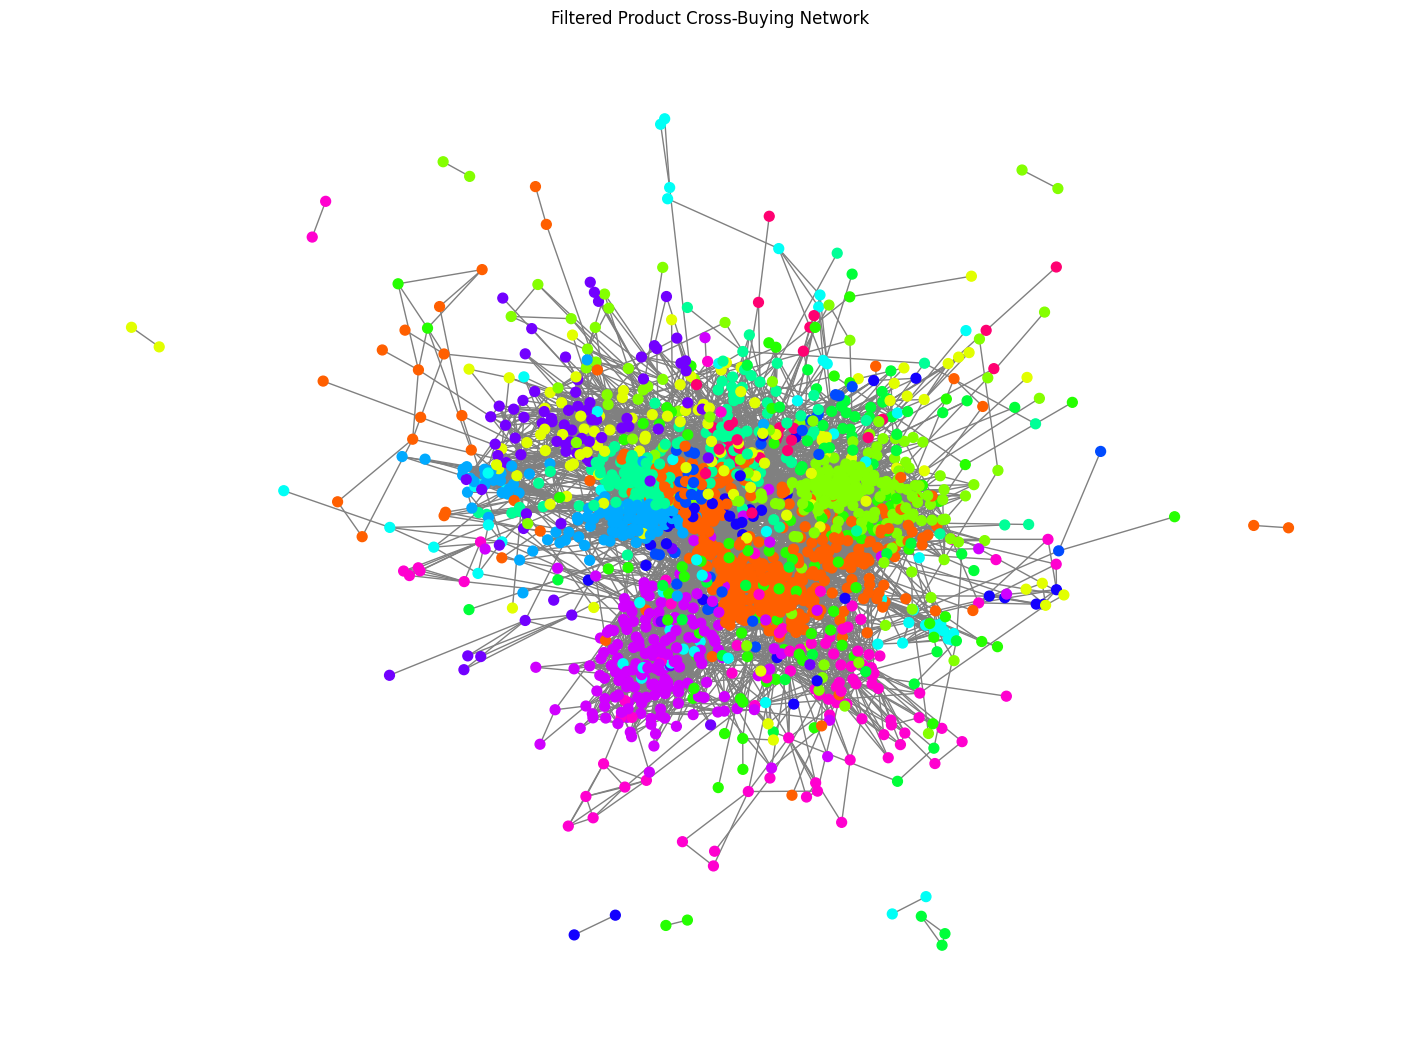

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

def analyze_cross_buying_patterns(merged_data: pd.DataFrame) -> None:
    """
    Analyze cross-buying patterns of products.
    """
    # 1. Create a co-occurrence matrix
    product_data = merged_data.groupby('order_id')['product_id'].apply(list).reset_index()
    product_data['product_id'] = product_data['product_id'].apply(lambda x: list(set(x)))  # Remove duplicates within the same order
    
    # Create a product co-occurrence matrix
    from itertools import combinations
    from collections import defaultdict
    
    co_occurrence = defaultdict(int)
    for products in product_data['product_id']:
        for combo in combinations(products, 2):
            co_occurrence[tuple(sorted(combo))] += 1
    
    co_occurrence_df = pd.DataFrame(list(co_occurrence.items()), columns=['product_pair', 'count'])
    co_occurrence_df[['product_1', 'product_2']] = pd.DataFrame(co_occurrence_df['product_pair'].tolist(), index=co_occurrence_df.index)
    co_occurrence_matrix = co_occurrence_df.pivot(index='product_1', columns='product_2', values='count').fillna(0)
    
    # 2. Calculate the lift for each pair of products
    product_counts = merged_data['product_id'].value_counts()
    total_orders = len(product_data)
    
    def calculate_lift(row):
        product_1 = row['product_1']
        product_2 = row['product_2']
        count_1 = product_counts[product_1]
        count_2 = product_counts[product_2]
        return (row['count'] / total_orders) / ((count_1 / total_orders) * (count_2 / total_orders))

    co_occurrence_df['lift'] = co_occurrence_df.apply(calculate_lift, axis=1)
    
    # 3. Filter by lift threshold (increase the threshold for the graph)
    lift_threshold_heatmap = co_occurrence_df['lift'].quantile(0.75)
    lift_threshold_graph = co_occurrence_df['lift'].quantile(0.95)  # Increased threshold
    filtered_co_occurrence_df_heatmap = co_occurrence_df[co_occurrence_df['lift'] > lift_threshold_heatmap]
    filtered_co_occurrence_df_graph = co_occurrence_df[co_occurrence_df['lift'] > lift_threshold_graph]
    
    # Create a filtered co-occurrence matrix for the heatmap
    filtered_co_occurrence_matrix = filtered_co_occurrence_df_heatmap.pivot(index='product_1', columns='product_2', values='count').fillna(0)
    
    # 4. Create a heatmap to visualize the filtered co-occurrence matrix
    plt.figure(figsize=(14, 10))
    cmap = sns.color_palette("Reds", as_cmap=True)
    sns.heatmap(filtered_co_occurrence_matrix, cmap=cmap, cbar_kws={'label': 'Co-occurrence Count'})
    plt.title('Filtered Product Co-occurrence Matrix')
    plt.xlabel('Product')
    plt.ylabel('Product')
    plt.show()
    
    # 5. Create a network graph to visualize the relationships between products
    G = nx.Graph()
    
    for _, row in filtered_co_occurrence_df_graph.iterrows():
        G.add_edge(row['product_1'], row['product_2'], weight=row['lift'])
    
    # Get unique product classes and assign colors
    product_classes = merged_data[['product_id', 'product_class']].drop_duplicates().set_index('product_id')
    unique_classes = product_classes['product_class'].unique()
    class_colors = sns.color_palette("hsv", len(unique_classes))
    class_color_map = dict(zip(unique_classes, class_colors))
    
    # Assign colors to nodes based on product class
    node_colors = [class_color_map[product_classes.loc[node]['product_class']] for node in G.nodes]
    
    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(G, k=0.1)
    nx.draw(G, pos, node_color=node_colors, with_labels=False, node_size=50, font_size=10, edge_color='gray')
    plt.title('Filtered Product Cross-Buying Network')
    plt.show()

# Ensure 'age' is calculated correctly before generating insights
analyze_cross_buying_patterns(merged_data_corrected)

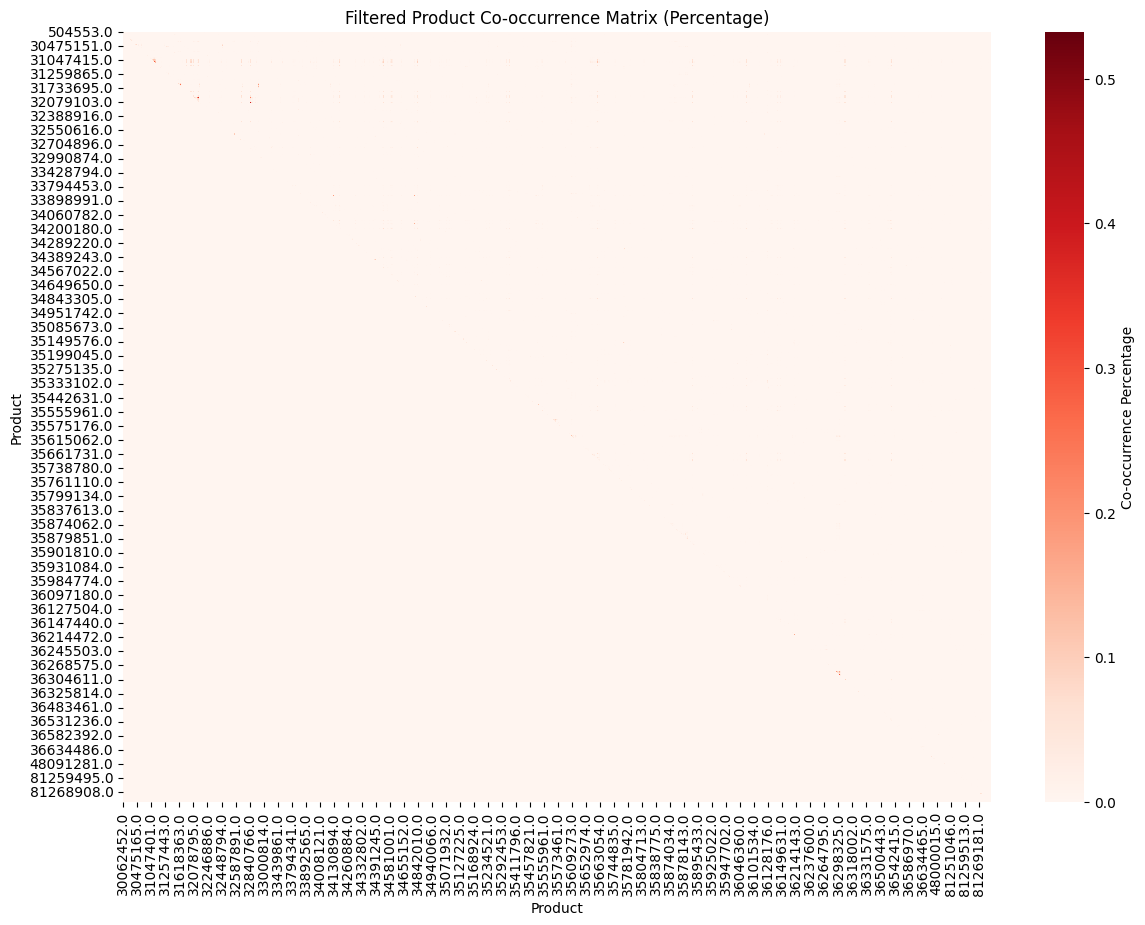

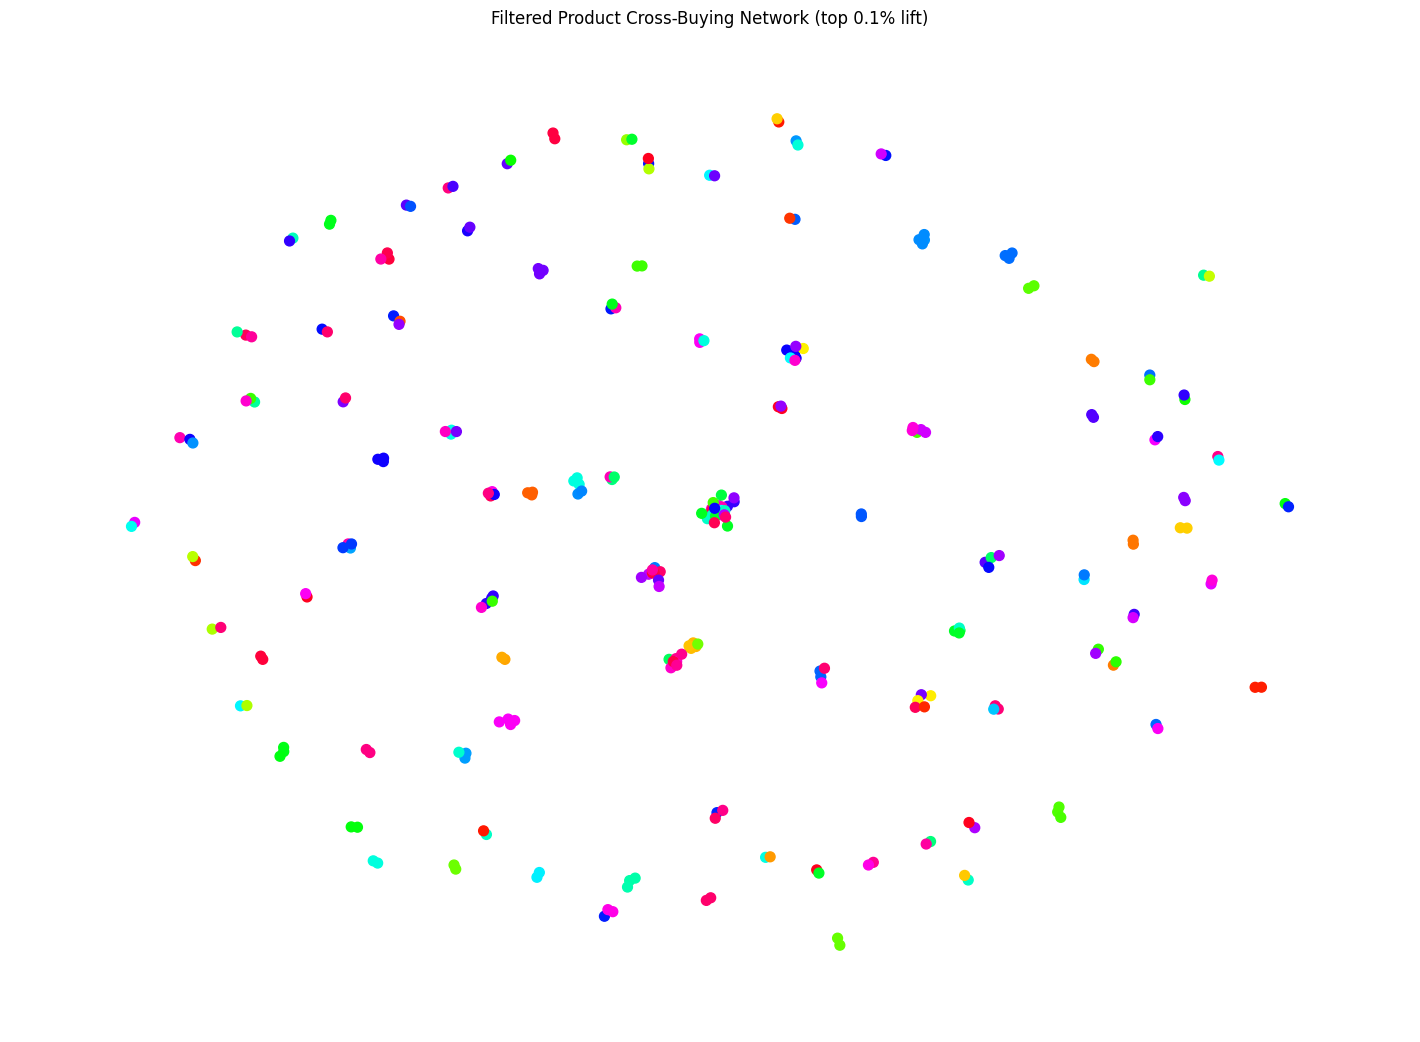

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

def analyze_cross_buying_patterns_by_product(merged_data: pd.DataFrame) -> None:
    category_data = merged_data.groupby('order_id')['product_id'].apply(list).reset_index()
    category_data['product_id'] = category_data['product_id'].apply(lambda x: list(set(x)))
    
    from itertools import combinations
    from collections import defaultdict
    
    co_occurrence = defaultdict(int)
    for products in category_data['product_id']:
        for combo in combinations(products, 2):
            co_occurrence[tuple(sorted(combo))] += 1
    
    co_occurrence_df = pd.DataFrame(list(co_occurrence.items()), columns=['product_pair', 'count'])
    co_occurrence_df[['product_1', 'product_2']] = pd.DataFrame(co_occurrence_df['product_pair'].tolist(), index=co_occurrence_df.index)
    
    total_orders = len(category_data)
    co_occurrence_df['percentage'] = co_occurrence_df['count'] / total_orders * 100
    
    percentage_co_occurrence_matrix = co_occurrence_df.pivot(index='product_1', columns='product_2', values='percentage').fillna(0)
    
    product_counts = merged_data['product_id'].value_counts()
    
    def calculate_lift(row):
        product_1 = row['product_1']
        product_2 = row['product_2']
        count_1 = product_counts[product_1]
        count_2 = product_counts[product_2]
        return (row['count'] / total_orders) / ((count_1 / total_orders) * (count_2 / total_orders))

    co_occurrence_df['lift'] = co_occurrence_df.apply(calculate_lift, axis=1)
    
    lift_threshold_heatmap = co_occurrence_df['lift'].quantile(0.65)
    lift_threshold_graph = co_occurrence_df['lift'].quantile(0.999)
    filtered_co_occurrence_df_heatmap = co_occurrence_df[co_occurrence_df['lift'] > lift_threshold_heatmap]
    filtered_co_occurrence_df_graph = co_occurrence_df[co_occurrence_df['lift'] > lift_threshold_graph]
    
    filtered_percentage_co_occurrence_matrix = filtered_co_occurrence_df_heatmap.pivot(index='product_1', columns='product_2', values='percentage').fillna(0)
    
    plt.figure(figsize=(14, 10))
    cmap = sns.color_palette("Reds", as_cmap=True)
    sns.heatmap(filtered_percentage_co_occurrence_matrix, cmap=cmap, cbar_kws={'label': 'Co-occurrence Percentage'})
    plt.title('Filtered Product Co-occurrence Matrix (Percentage)')
    plt.xlabel('Product')
    plt.ylabel('Product')
    plt.show()
    
    G = nx.Graph()
    
    for _, row in filtered_co_occurrence_df_graph.iterrows():
        G.add_edge(row['product_1'], row['product_2'], weight=row['lift'])
    
    unique_products = merged_data['product_id'].unique()
    product_colors = sns.color_palette("hsv", len(unique_products))
    product_color_map = dict(zip(unique_products, product_colors))
    
    node_colors = [product_color_map[node] for node in G.nodes]
    
    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(G, k=0.1)
    nx.draw(G, pos, node_color=node_colors, with_labels=False, node_size=50, font_size=10, edge_color='gray')
    plt.title('Filtered Product Cross-Buying Network (top 0.1% lift)')
    plt.show()

analyze_cross_buying_patterns_by_product(merged_data_corrected)

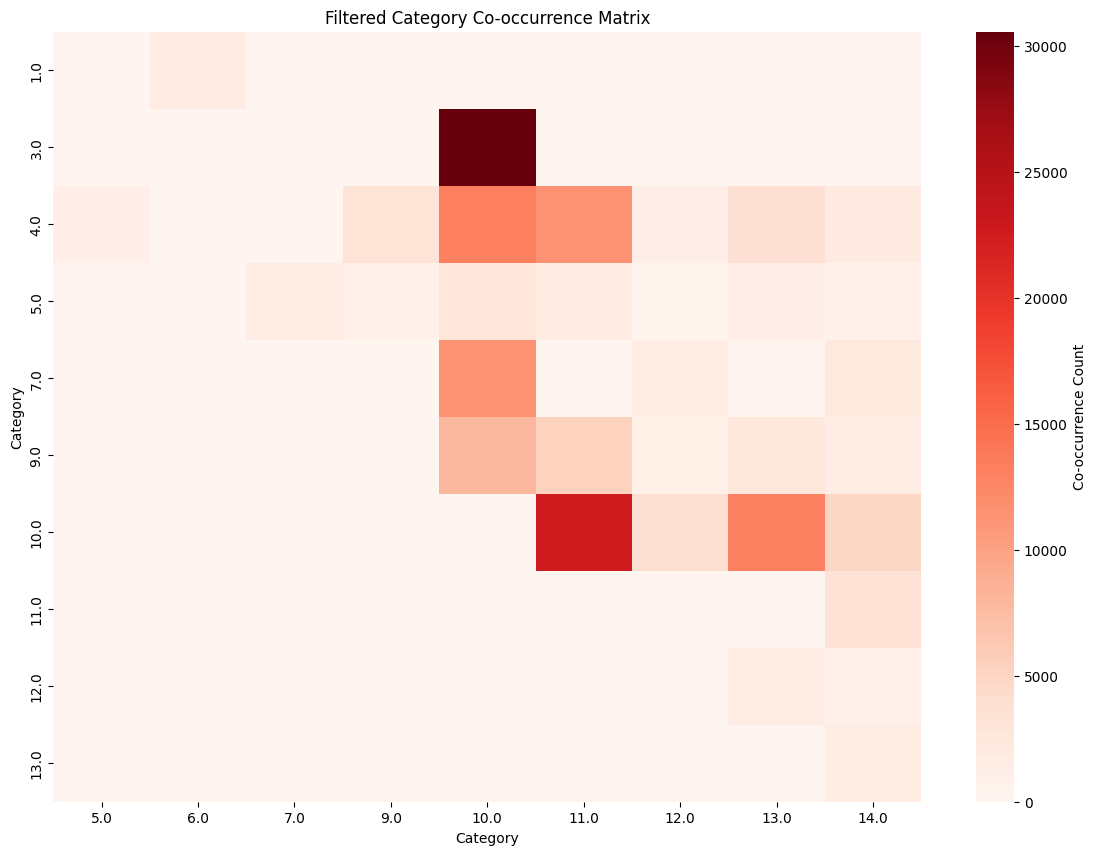

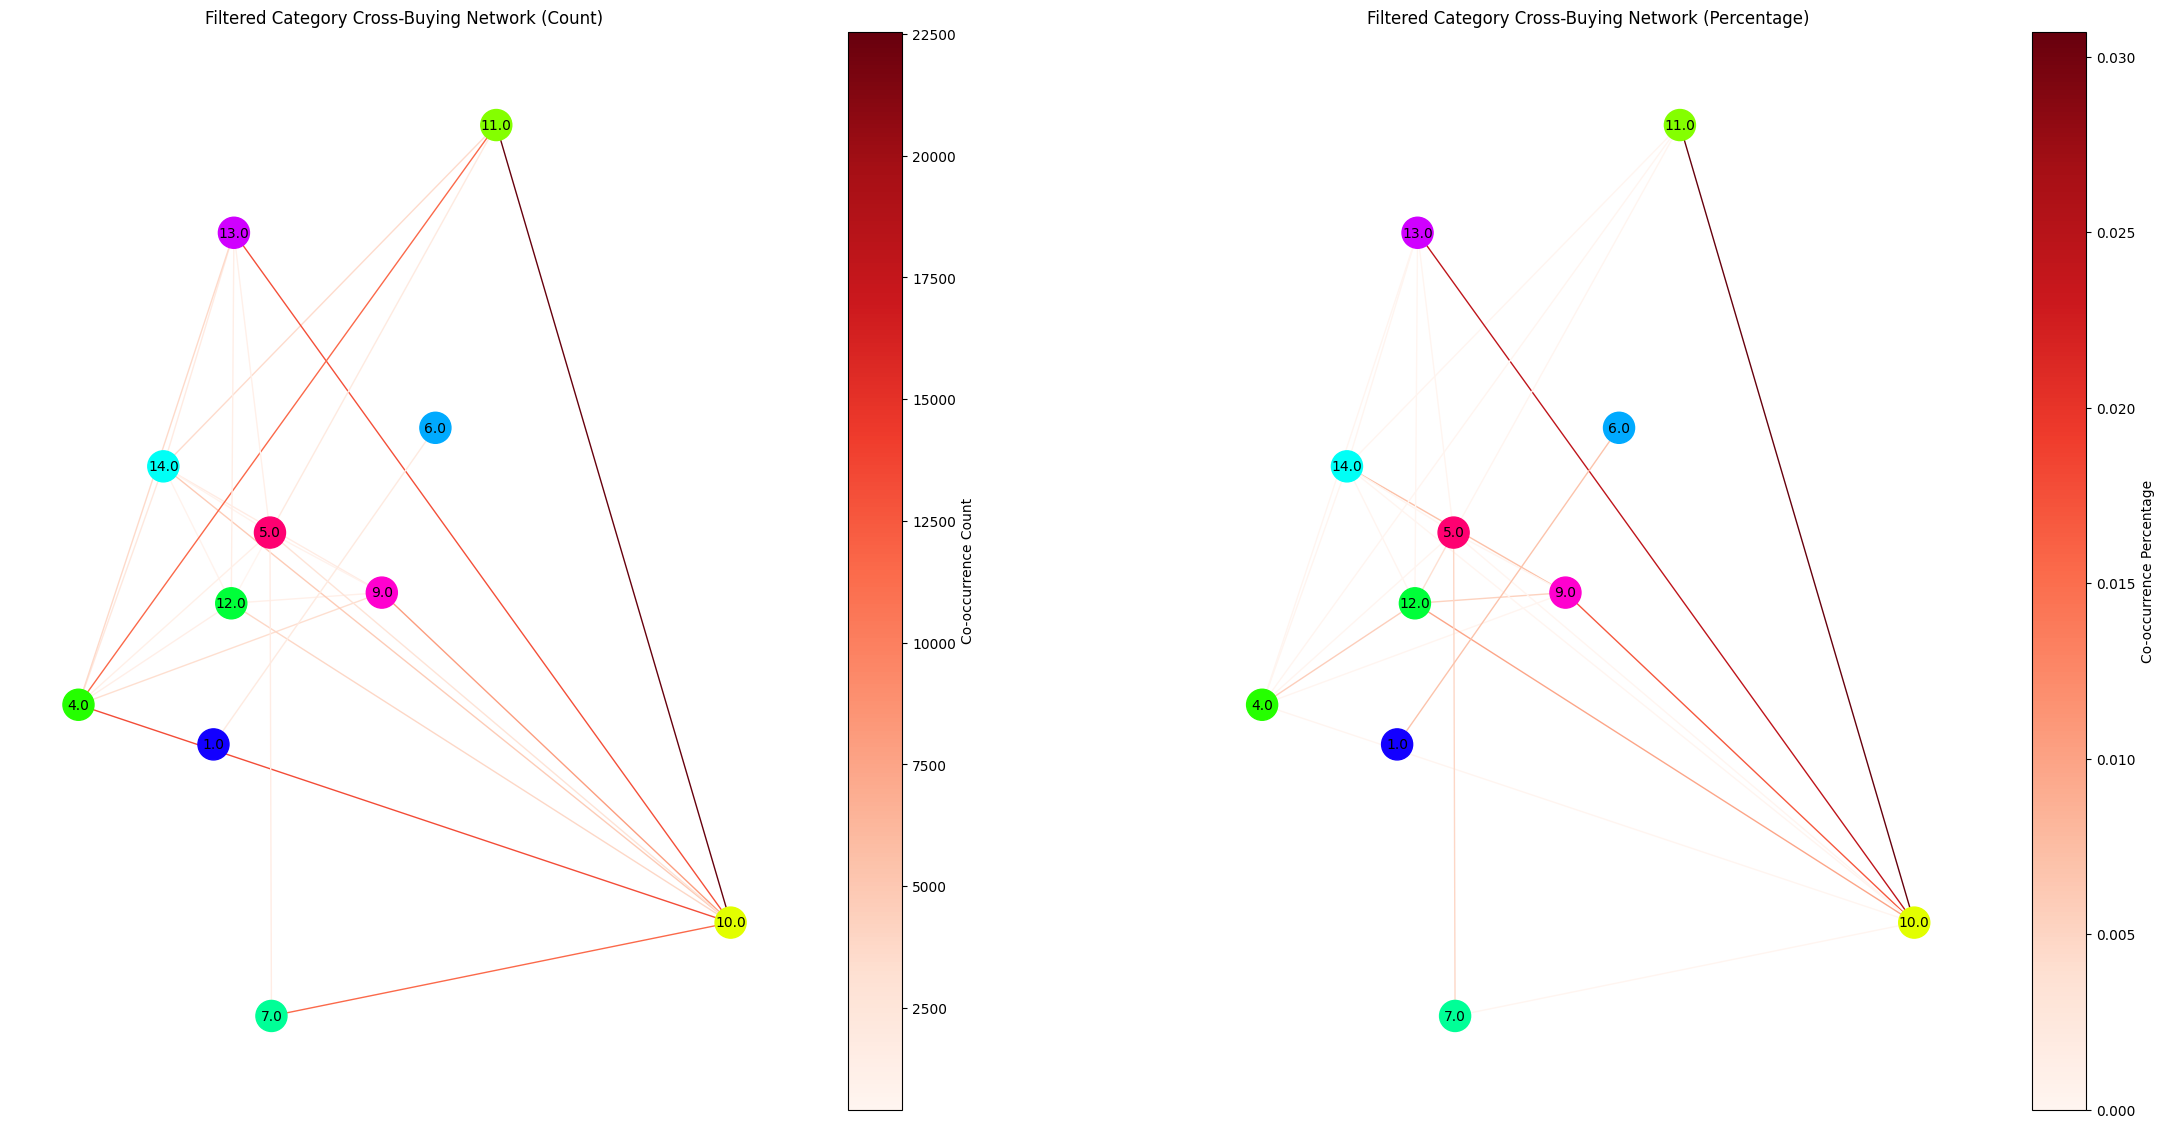

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

def analyze_cross_buying_patterns_by_category(merged_data: pd.DataFrame) -> None:
    """
    Analyze cross-buying patterns of product categories.
    """
    # 1. Group by product categories
    merged_data['product_category'] = merged_data['product_class']  # Assuming 'product_class' is the category
    category_data = merged_data.groupby('order_id')['product_category'].apply(list).reset_index()
    category_data['product_category'] = category_data['product_category'].apply(lambda x: list(set(x)))  # Remove duplicates within the same order
    
    # Create a category co-occurrence matrix
    from itertools import combinations
    from collections import defaultdict
    
    co_occurrence = defaultdict(int)
    for categories in category_data['product_category']:
        for combo in combinations(categories, 2):
            co_occurrence[tuple(sorted(combo))] += 1
    
    co_occurrence_df = pd.DataFrame(list(co_occurrence.items()), columns=['category_pair', 'count'])
    co_occurrence_df[['category_1', 'category_2']] = pd.DataFrame(co_occurrence_df['category_pair'].tolist(), index=co_occurrence_df.index)
    co_occurrence_matrix = co_occurrence_df.pivot(index='category_1', columns='category_2', values='count').fillna(0)
    
    # 2. Calculate the lift for each pair of categories
    category_counts = merged_data['product_category'].value_counts()
    total_orders = len(category_data)
    
    def calculate_lift(row):
        category_1 = row['category_1']
        category_2 = row['category_2']
        count_1 = category_counts[category_1]
        count_2 = category_counts[category_2]
        return (row['count'] / total_orders) / ((count_1 / total_orders) * (count_2 / total_orders))

    co_occurrence_df['lift'] = co_occurrence_df.apply(calculate_lift, axis=1)
    
    # 3. Filter by lift threshold (90th percentile for the graph)
    lift_threshold_heatmap = co_occurrence_df['lift'].quantile(0.65)
    lift_threshold_graph = co_occurrence_df['lift'].quantile(0.70)
    filtered_co_occurrence_df_heatmap = co_occurrence_df[co_occurrence_df['lift'] > lift_threshold_heatmap]
    filtered_co_occurrence_df_graph = co_occurrence_df[co_occurrence_df['lift'] > lift_threshold_graph]
    
    # Create a filtered co-occurrence matrix for the heatmap
    filtered_co_occurrence_matrix = filtered_co_occurrence_df_heatmap.pivot(index='category_1', columns='category_2', values='count').fillna(0)
    
    # 4. Create a heatmap to visualize the filtered co-occurrence matrix
    plt.figure(figsize=(14, 10))
    cmap = sns.color_palette("Reds", as_cmap=True)
    sns.heatmap(filtered_co_occurrence_matrix, cmap=cmap, cbar_kws={'label': 'Co-occurrence Count'})
    plt.title('Filtered Category Co-occurrence Matrix')
    plt.xlabel('Category')
    plt.ylabel('Category')
    plt.show()
    
    # 5. Create a network graph to visualize the relationships between categories based on count
    G = nx.Graph()
    
    for _, row in filtered_co_occurrence_df_graph.iterrows():
        G.add_edge(row['category_1'], row['category_2'], weight=row['count'])
    
    # Assign colors to nodes based on categories
    unique_categories = merged_data['product_category'].unique()
    category_colors = sns.color_palette("hsv", len(unique_categories))
    category_color_map = dict(zip(unique_categories, category_colors))
    
    node_colors = [category_color_map[node] for node in G.nodes]
    
    # Normalize edge weights for color mapping
    edge_weights = [G[u][v]['weight'] for u, v in G.edges]
    norm = Normalize(vmin=min(edge_weights), vmax=max(edge_weights))
    cmap = plt.cm.Reds
    edge_colors = [cmap(norm(G[u][v]['weight'])) for u, v in G.edges]
    
    # 6. Create a network graph to visualize the relationships between categories based on percentage
    G_percentage = nx.Graph()
    
    for _, row in filtered_co_occurrence_df_graph.iterrows():
        G_percentage.add_edge(row['category_1'], row['category_2'], weight=row['count'])
    
    # Calculate the percentage of times products are bought together
    def calculate_percentage(row):
        category_1 = row['category_1']
        category_2 = row['category_2']
        count_1 = category_counts[category_1]
        count_2 = category_counts[category_2]
        return row['count'] / (count_1 + count_2 - row['count'])

    co_occurrence_df['percentage'] = co_occurrence_df.apply(calculate_percentage, axis=1)
    
    # Normalize edge weights for color mapping
    edge_weights_percentage = [G_percentage[u][v]['weight'] for u, v in G_percentage.edges]
    edge_percentages = []
    for u, v in G_percentage.edges:
        percentage = co_occurrence_df[(co_occurrence_df['category_1'] == u) & (co_occurrence_df['category_2'] == v)]['percentage']
        if not percentage.empty:
            edge_percentages.append(percentage.values[0])
        else:
            edge_percentages.append(0)  # Default to 0 if no percentage is found
    
    norm_percentage = Normalize(vmin=min(edge_percentages), vmax=max(edge_percentages))
    edge_colors_percentage = [cmap(norm_percentage(percentage)) for percentage in edge_percentages]
    
    # Plot both graphs side by side
    fig, axes = plt.subplots(1, 2, figsize=(28, 14))
    
    # Graph based on count
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, pos, ax=axes[0], node_color=node_colors, with_labels=True, node_size=500, font_size=10, edge_color=edge_colors, edge_cmap=cmap, edge_vmin=min(edge_weights), edge_vmax=max(edge_weights))
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=axes[0], label='Co-occurrence Count')
    axes[0].set_title('Filtered Category Cross-Buying Network (Count)')
    
    # Graph based on percentage
    pos = nx.kamada_kawai_layout(G_percentage)
    nx.draw(G_percentage, pos, ax=axes[1], node_color=node_colors, with_labels=True, node_size=500, font_size=10, edge_color=edge_colors_percentage, edge_cmap=cmap, edge_vmin=min(edge_percentages), edge_vmax=max(edge_percentages))
    sm_percentage = ScalarMappable(cmap=cmap, norm=norm_percentage)
    sm_percentage.set_array([])
    fig.colorbar(sm_percentage, ax=axes[1], label='Co-occurrence Percentage')
    axes[1].set_title('Filtered Category Cross-Buying Network (Percentage)')
    
    plt.show()

# Ensure 'age' is calculated correctly before generating insights
analyze_cross_buying_patterns_by_category(merged_data_corrected)

In [30]:
print(merged_data_corrected.columns)

Index(['customer_id', 'address_id', 'birthdate', 'gender', 'job_type',
       'email_provider', 'flag_phone_provided', 'flag_privacy', 'order_id',
       'store_id', 'product_id', 'direction', 'gross_price', 'price_reduction',
       'purchase_datetime', 'postal_code', 'district', 'region',
       'product_class', 'review_id', 'review_text', 'account_id',
       'favorite_store', 'loyalty_type', 'loyatlty_status', 'activation_date',
       'sentiment_score', 'age', 'product_category'],
      dtype='object')


In [32]:
merged_data_corrected['product_category']

0          3.0
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
3372610    NaN
3372611    NaN
3372612    NaN
3372613    NaN
3372614    NaN
Name: product_category, Length: 3372615, dtype: float64

KeyError in seasonal_purchasing_trends: 'product_category'
KeyError in review_sentiment_impact_on_sales: "Column(s) ['sentiment_score'] do not exist"
KeyError in customer_segmentation: "Column(s) ['product_category'] do not exist"
KeyError in product_category_performance: 'product_category'


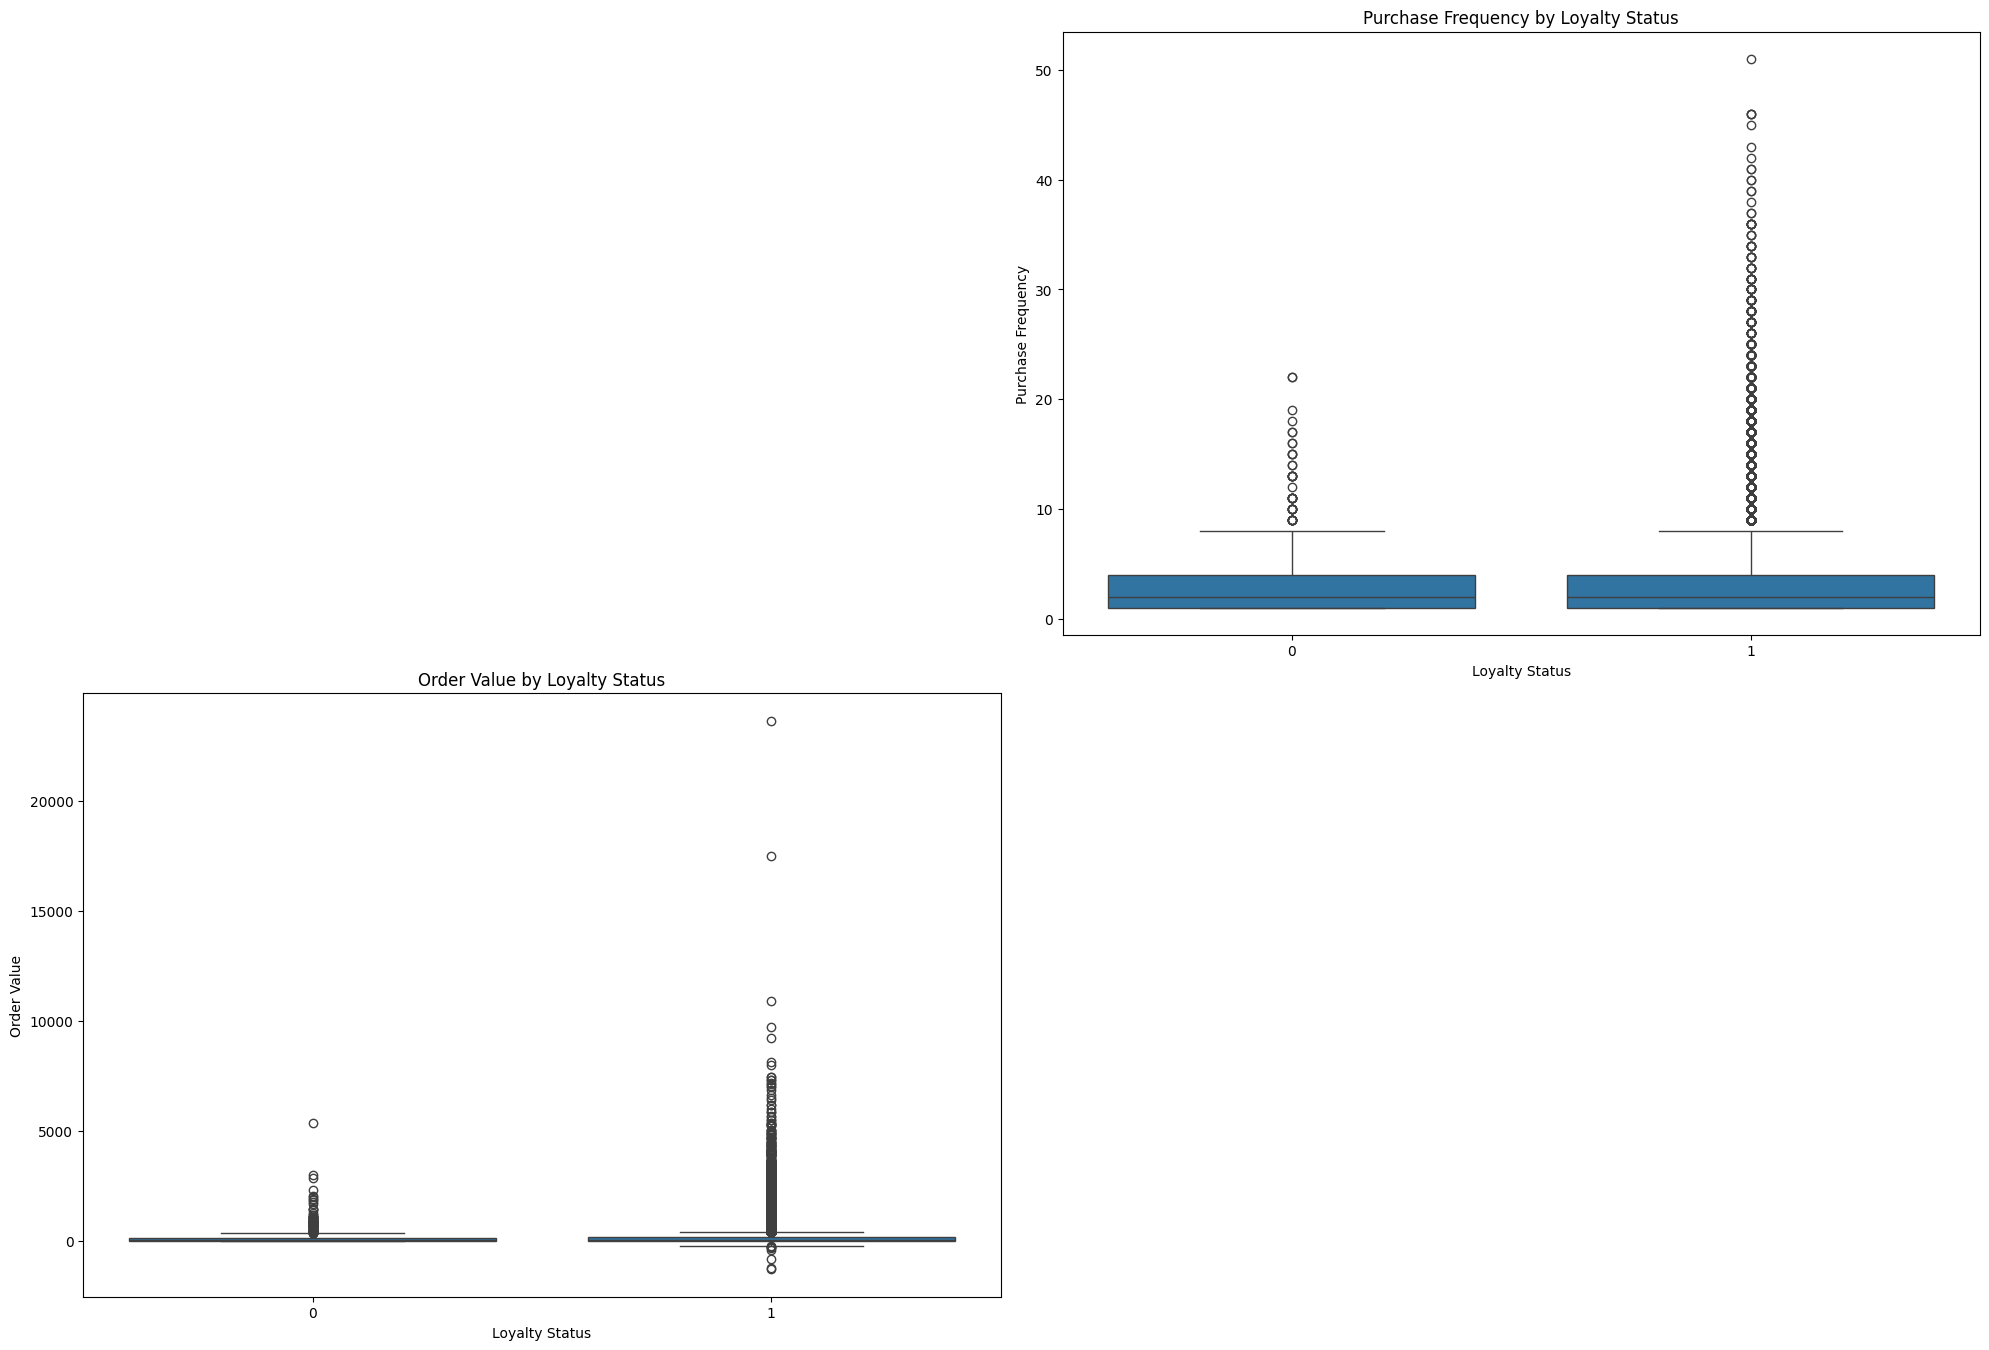

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Assuming merged_data is your DataFrame
# merged_data = pd.read_csv('your_data.csv')  # Load your data if not already loaded

def seasonal_purchasing_trends(merged_data: pd.DataFrame) -> None:
    """Visualize sales trends over time by product category."""
    try:
        merged_data['purchase_datetime'] = pd.to_datetime(merged_data['purchase_datetime'])
        merged_data['month'] = merged_data['purchase_datetime'].dt.to_period('M')
        
        sales_trends = merged_data.groupby(['month', 'product_category'])['gross_price'].sum().reset_index()
        
        plt.subplot(3, 2, 1)
        sns.lineplot(data=sales_trends, x='month', y='gross_price', hue='product_category')
        plt.title('Sales Trends Over Time by Product Category')
        plt.xlabel('Month')
        plt.ylabel('Sales Amount')
        plt.xticks(rotation=45)
    except KeyError as e:
        print(f"KeyError in seasonal_purchasing_trends: {e}")

def review_sentiment_impact_on_sales(merged_data: pd.DataFrame) -> None:
    """Visualize sentiment score vs. sales volume."""
    try:
        sales_sentiment = merged_data.groupby('product_id').agg({
            'sentiment_score': 'mean',
            'gross_price': 'sum'
        }).reset_index()
        
        plt.subplot(3, 2, 2)
        sns.scatterplot(data=sales_sentiment, x='sentiment_score', y='gross_price')
        plt.title('Sentiment Score vs. Sales Volume')
        plt.xlabel('Sentiment Score')
        plt.ylabel('Sales Volume')
    except KeyError as e:
        print(f"KeyError in review_sentiment_impact_on_sales: {e}")

def customer_segmentation(merged_data: pd.DataFrame) -> None:
    """Visualize customer segmentation based on purchasing behavior."""
    try:
        customer_data = merged_data.groupby('customer_id').agg({
            'order_id': 'nunique',
            'gross_price': 'mean',
            'product_category': lambda x: x.mode()[0]
        }).reset_index()
        
        customer_data.columns = ['customer_id', 'purchase_frequency', 'avg_order_value', 'favorite_category']
        
        kmeans = KMeans(n_clusters=3)
        customer_data['cluster'] = kmeans.fit_predict(customer_data[['purchase_frequency', 'avg_order_value']])
        
        ax = plt.subplot(3, 2, 3, projection='3d')
        scatter = ax.scatter(customer_data['purchase_frequency'], customer_data['avg_order_value'], customer_data['cluster'], c=customer_data['cluster'], cmap='viridis')
        ax.set_title('Customer Segmentation Based on Purchasing Behavior')
        ax.set_xlabel('Purchase Frequency')
        ax.set_ylabel('Average Order Value')
        ax.set_zlabel('Cluster')
        plt.legend(*scatter.legend_elements(), title="Clusters")
    except KeyError as e:
        print(f"KeyError in customer_segmentation: {e}")

def loyalty_program_impact(merged_data: pd.DataFrame) -> None:
    """Visualize impact of loyalty programs on customer behavior."""
    try:
        loyalty_data = merged_data.groupby(['customer_id', 'loyatlty_status']).agg({
            'order_id': 'nunique',
            'gross_price': 'sum'
        }).reset_index()
        
        plt.subplot(3, 2, 4)
        sns.boxplot(data=loyalty_data, x='loyatlty_status', y='order_id')
        plt.title('Purchase Frequency by Loyalty Status')
        plt.xlabel('Loyalty Status')
        plt.ylabel('Purchase Frequency')
        
        plt.subplot(3, 2, 5)
        sns.boxplot(data=loyalty_data, x='loyatlty_status', y='gross_price')
        plt.title('Order Value by Loyalty Status')
        plt.xlabel('Loyalty Status')
        plt.ylabel('Order Value')
    except KeyError as e:
        print(f"KeyError in loyalty_program_impact: {e}")

def product_category_performance(merged_data: pd.DataFrame) -> None:
    """Visualize product category performance over time."""
    try:
        merged_data['purchase_datetime'] = pd.to_datetime(merged_data['purchase_datetime'])
        merged_data['month'] = merged_data['purchase_datetime'].dt.to_period('M')
        
        category_performance = merged_data.groupby(['month', 'product_category'])['gross_price'].sum().unstack().fillna(0)
        
        plt.subplot(3, 2, 6)
        category_performance.plot(kind='area', stacked=True, figsize=(14, 10), colormap='viridis', ax=plt.gca())
        plt.title('Product Category Performance Over Time')
        plt.xlabel('Month')
        plt.ylabel('Sales Amount')
        plt.xticks(rotation=45)
        plt.legend(title='Product Category')
    except KeyError as e:
        print(f"KeyError in product_category_performance: {e}")

plt.figure(figsize=(20, 20))
seasonal_purchasing_trends(merged_data)
review_sentiment_impact_on_sales(merged_data)
customer_segmentation(merged_data)
loyalty_program_impact(merged_data)
product_category_performance(merged_data)
plt.tight_layout()
plt.show()

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


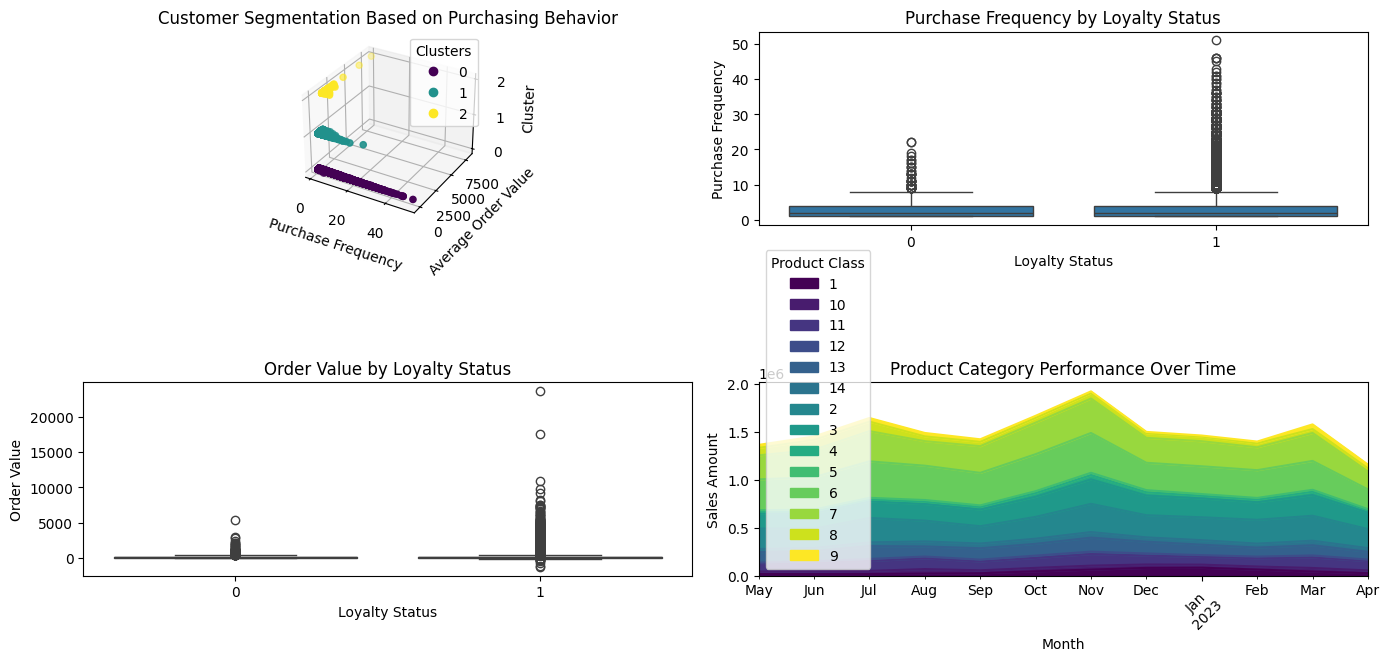

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Assuming merged_data is your DataFrame
# merged_data = pd.read_csv('your_data.csv')  # Load your data if not already loaded

def seasonal_purchasing_trends(merged_data: pd.DataFrame) -> None:
    """Visualize sales trends over time by product class."""
    try:
        merged_data['purchase_datetime'] = pd.to_datetime(merged_data['purchase_datetime'])
        merged_data['month'] = merged_data['purchase_datetime'].dt.to_period('M')
        
        # Ensure gross_price is numeric
        merged_data['gross_price'] = pd.to_numeric(merged_data['gross_price'], errors='coerce')
        
        sales_trends = merged_data.groupby(['month', 'product_class'])['gross_price'].sum().reset_index()
        
        plt.subplot(3, 2, 1)
        sns.lineplot(data=sales_trends, x='month', y='gross_price', hue='product_class')
        plt.title('Sales Trends Over Time by Product Class')
        plt.xlabel('Month')
        plt.ylabel('Sales Amount')
        plt.xticks(rotation=45)
    except KeyError as e:
        print(f"KeyError in seasonal_purchasing_trends: {e}")
    except TypeError as e:
        print(f"TypeError in seasonal_purchasing_trends: {e}")

def customer_segmentation(merged_data: pd.DataFrame) -> None:
    """Visualize customer segmentation based on purchasing behavior."""
    try:
        customer_data = merged_data.groupby('customer_id').agg({
            'order_id': 'nunique',
            'gross_price': 'mean',
            'product_class': lambda x: x.mode()[0]
        }).reset_index()
        
        customer_data.columns = ['customer_id', 'purchase_frequency', 'avg_order_value', 'favorite_class']
        
        kmeans = KMeans(n_clusters=3)
        customer_data['cluster'] = kmeans.fit_predict(customer_data[['purchase_frequency', 'avg_order_value']])
        
        ax = plt.subplot(3, 2, 3, projection='3d')
        scatter = ax.scatter(customer_data['purchase_frequency'], customer_data['avg_order_value'], customer_data['cluster'], c=customer_data['cluster'], cmap='viridis')
        ax.set_title('Customer Segmentation Based on Purchasing Behavior')
        ax.set_xlabel('Purchase Frequency')
        ax.set_ylabel('Average Order Value')
        ax.set_zlabel('Cluster')
        plt.legend(*scatter.legend_elements(), title="Clusters")
    except KeyError as e:
        print(f"KeyError in customer_segmentation: {e}")

def loyalty_program_impact(merged_data: pd.DataFrame) -> None:
    """Visualize impact of loyalty programs on customer behavior."""
    try:
        loyalty_data = merged_data.groupby(['customer_id', 'loyatlty_status']).agg({
            'order_id': 'nunique',
            'gross_price': 'sum'
        }).reset_index()
        
        plt.subplot(3, 2, 4)
        sns.boxplot(data=loyalty_data, x='loyatlty_status', y='order_id')
        plt.title('Purchase Frequency by Loyalty Status')
        plt.xlabel('Loyalty Status')
        plt.ylabel('Purchase Frequency')
        
        plt.subplot(3, 2, 5)
        sns.boxplot(data=loyalty_data, x='loyatlty_status', y='gross_price')
        plt.title('Order Value by Loyalty Status')
        plt.xlabel('Loyalty Status')
        plt.ylabel('Order Value')
    except KeyError as e:
        print(f"KeyError in loyalty_program_impact: {e}")

def product_category_performance(merged_data: pd.DataFrame) -> None:
    """Visualize product category performance over time."""
    try:
        merged_data['purchase_datetime'] = pd.to_datetime(merged_data['purchase_datetime'])
        merged_data['month'] = merged_data['purchase_datetime'].dt.to_period('M')
        
        # Ensure gross_price is numeric
        merged_data['gross_price'] = pd.to_numeric(merged_data['gross_price'], errors='coerce')
        
        category_performance = merged_data.groupby(['month', 'product_class'])['gross_price'].sum().unstack().fillna(0)
        
        plt.subplot(3, 2, 6)
        category_performance.plot(kind='area', stacked=True, figsize=(14, 10), colormap='viridis', ax=plt.gca())
        plt.title('Product Category Performance Over Time')
        plt.xlabel('Month')
        plt.ylabel('Sales Amount')
        plt.xticks(rotation=45)
        plt.legend(title='Product Class')
    except KeyError as e:
        print(f"KeyError in product_category_performance: {e}")
    except TypeError as e:
        print(f"TypeError in product_category_performance: {e}")

plt.figure(figsize=(20, 20))
# seasonal_purchasing_trends(merged_data)
customer_segmentation(merged_data)
loyalty_program_impact(merged_data)
product_category_performance(merged_data)
plt.tight_layout()
plt.show()

In [ ]:
merged_data.columns

Index(['order_id', 'customer_id', 'store_id', 'product_id', 'direction',
       'gross_price', 'price_reduction', 'purchase_datetime', 'product_class',
       'address_id', 'birthdate', 'gender', 'job_type', 'email_provider',
       'flag_phone_provided', 'flag_privacy', 'postal_code', 'district',
       'region', 'account_id', 'favorite_store', 'loyalty_type',
       'loyatlty_status', 'activation_date', 'month'],
      dtype='object')